In [1]:
### Data Analysis/Plots for the NMRLipidsVI Project on the Polarizable Force Fields ###

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')



In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
import MDAnalysis as mda
import pandas as pd # for fetching data from github
import seaborn as sns # for the colors

In [5]:
## some figure properties ##

width_one_column = 3.2
width_two_columns = 6.4

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
flare = sns.color_palette("flare",20)
flare

[(0.92539502, 0.64345456, 0.47594352),
 (0.92077582, 0.59804722, 0.44818634),
 (0.9155979, 0.55210684, 0.42070204),
 (0.90921368, 0.5056543, 0.39544411),
 (0.90077904, 0.45884905, 0.37556121),
 (0.888292, 0.40830288, 0.36223756),
 (0.87199254, 0.3633634, 0.35974223),
 (0.84916723, 0.32289973, 0.36711424),
 (0.81942908, 0.28911553, 0.38102921),
 (0.7826624, 0.26420493, 0.39754146),
 (0.73695678, 0.24620072, 0.41357737),
 (0.69226314, 0.23413578, 0.42480327),
 (0.64795375, 0.22217149, 0.43330852),
 (0.60407977, 0.21017746, 0.43913439),
 (0.56041794, 0.19845221, 0.44207535),
 (0.51278481, 0.18693492, 0.44112605),
 (0.46818879, 0.17788392, 0.43552047),
 (0.42355299, 0.16934709, 0.42581586),
 (0.37928736, 0.16052483, 0.41270599),
 (0.33604378, 0.15006017, 0.39835754)]

In [7]:
crest = sns.color_palette("crest",20)
crest

[(0.59435366, 0.77778758, 0.56892099),
 (0.54228969, 0.75295306, 0.56919546),
 (0.48942421, 0.72854938, 0.56751036),
 (0.43894492, 0.70353863, 0.56629734),
 (0.39308781, 0.67748696, 0.56581581),
 (0.34892097, 0.64828676, 0.56513633),
 (0.31270304, 0.62072111, 0.56379321),
 (0.27987847, 0.59284232, 0.56159709),
 (0.24929311, 0.56486397, 0.5586654),
 (0.21885269, 0.53704347, 0.55537294),
 (0.18565609, 0.50701014, 0.55177937),
 (0.15615526, 0.47913212, 0.54850526),
 (0.13063777, 0.4508034, 0.54502674),
 (0.11409965, 0.42169502, 0.54065622),
 (0.11131735, 0.39155635, 0.53422678),
 (0.1189438, 0.35794203, 0.5248497),
 (0.13155228, 0.32608217, 0.51335321),
 (0.14573579, 0.29354139, 0.49847009),
 (0.15862147, 0.26048295, 0.48005785),
 (0.16768475, 0.22656122, 0.46170223)]

In [8]:
set2 = sns.color_palette("Set2")

In [9]:
## some shitty color palette for now ##
## will be changed upon publication state ##

color_popc_c36 = set2[0]
color_exp = 'black'
color_popc_0 = set2[3]
color_popc_350_nacl = flare[0]
color_popc_350_cacl = crest[0]
color_popc_450_nacl = flare[7]
color_popc_450_cacl = crest[7]
color_popc_650_nacl = flare[15]
color_popc_650_cacl = crest[15]
color_popc_1000_nacl = flare[19]
color_popc_1000_cacl = crest[19]

color_pope_0 = set2[2]
color_pope_c36 = set2[4]
color_pope_exp = 'black'

In [10]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

## Order Parameters ##

### popc ###

In [11]:
# https://github.com/NMRLipids/expDATABANK/blob/main/Data/POPC/T300K/Headgroup_Glycerol_Order_Parameters_Experiments.dat 
# From Ferreira et al. Phys. Chem. Chem. Phys. 2013, 15, 1976−1989.
# http://dx.doi.org/10.1039/C2CP42738A
#
# Signs determined from independent experiments, as discussed
# in https://doi.org/10.1016/j.bbamem.2016.01.019
#
# Error bars determined as discussed in
# https://doi.org/10.1016/j.bbamem.2016.01.019 and http://dx.doi.org/10.1021/acs.jpcb.5b04878
#
# 0 = gamma
# 1 = beta
# 2 = alpha
# 3 = g3 
# 4 = g2 
# 5 = g1 
#label Order_Parameter_1  Order_Parameter_2   error
#0      0.00111083        nan                 0.02
#1     -0.04478707        nan                 0.02
#2      0.05589248        nan                 0.02 
#3      -0.23134863        nan                0.02
#4     -0.20691616        nan                 0.02
#5       0.00000000       -0.14991575         0.02

#exp_popc_head_order = np.array([0.00111083,-0.04478707,  0.05589248,-0.23134863,-0.20691616, 0,-0.14991575])
#exp_popc_head_order_err = np.array([0.02,0.02,0.02,0.02,0.02,0.02,0.02])


In [12]:
2809/128

21.9453125

In [13]:
# CHARMM36 results #
#https://github.com/NMRLipids/MATCH/blob/master/Data/Lipid_Bilayers/POPC/T300K/MODEL_CHARMM36/OrdParsPOPC.dat


# OP_name    resname    atom1    atom2    OP_mean   OP_stddev  OP_stem
#--------------------------------------------------------------------
#alpha2               POPC    C11   H11B   0.03340  0.02040  0.00127 
#alpha1               POPC    C11   H11A   0.03453  0.02123  0.00133 
#g2_1                 POPC    C2    HS    -0.19052  0.03579  0.00224 
#g1_1                 POPC    C3    HX    -0.17030  0.04127  0.00258 
#g1_2                 POPC    C3    HY    -0.04198  0.03293  0.00206 
#g3_2                 POPC    C1    HB    -0.24488  0.02253  0.00141 
#g3_1                 POPC    C1    HA    -0.22152  0.03090  0.00193 
#beta2                POPC    C12   H12B  -0.07786  0.01926  0.00120 
#beta1                POPC    C12   H12A  -0.07745  0.01818  0.00114

popc_head_order_charmm36_y = np.array([-0.07745,-0.07786,0.03453,0.03340,-0.22152,-0.24488,-0.19052,-0.17030 ,-0.04198])
popc_head_order_charmm36_err = np.array([0.00114, 0.00120,0.00133,0.00127,0.00193,0.00141,0.00224,0.00258,0.00206])

In [14]:
# head group definitions #
# C12 - H12A
b1 = ['M_G3C5_M', 'M_G3C5H1_M']
# C12 - H12B
b2 = ['M_G3C5_M', 'M_G3C5H2_M']
# C11 - H11A
a1 = ['M_G3C4_M', 'M_G3C4H1_M']
#C11 - H11B
a2 = ['M_G3C4_M', 'M_G3C4H2_M']
#C1 - HA
g31 = ['M_G3_M', 'M_G3H1_M']
#C1 - HB
g32 = ['M_G3_M', 'M_G3H2_M']
#C2 - HS
g2 = ['M_G2_M', 'M_G2H1_M']
#C3 - HX
g11 = ['M_G1_M', 'M_G1H1_M']
#C3 - HY
g12 = ['M_G1_M', 'M_G1H2_M']

In [15]:
base = '/media/peptid/batu_nmrlipids/nmrlipids/drude/Data/'
path = {}
path['popc_0'] = base + 'Simulations/69e/b8d/69eb8db2067cbb20310a499d8cd2c9d24b36a1b5/43da5fcd64c4496538ba2f47f5b55c44fd8843ab/'
path['popc_350_nacl'] = base + 'Simulations/4a6/16f/4a616f924cfe0af7309a7c75a75cb71f4ca4cb4b/319b20af22c0e6b576b1d48266579849cdd0ffc7/'
path['popc_350_cacl'] = base + 'Simulations/207/347/20734787525506df5164b6e7a8e9fe158eb42d93/e69c46a7f69132e734a5dc908ef0bbfa03a91abd/'
path['popc_450_nacl'] = base + 'Simulations/b14/342/b14342cef43c6a52dc0671e5ad19c2f44144d8f4/80f189afb6f4ccb62ef2f8329c01c0ae3d31ce5b/'
path['popc_450_cacl'] = base + 'Simulations/05e/708/05e7087dc9959a392f9d76f1fd01cc2604138817/74ae0776f86775aa5b07e9dfe54a2e92cc752b2a/'
path['popc_650_nacl'] = base + 'Simulations/31d/b07/31db070da5fcb5003e09f85820738b4d3e87efee/14dc9def4bb06d082a836c65deaf77a79a476edc/'
path['popc_650_cacl'] = base + 'Simulations/d2e/6fb/d2e6fbd13e9586fae38075eeb1c388638fc1a06a/4913267ea1a9e492c593ab2b8ab3f5567f60d0f0/'
path['popc_1000_nacl'] = base + 'Simulations/1b2/de8/1b2de8ba9cc3027f7b6c08fa9dfb49332c54b2c7/76367e896a6fb125a00434202635553eef2b23ce/'
path['popc_1000_cacl'] = base + 'Simulations/a0e/63e/a0e63ed74f9a1f5f95ccb65e4e08666f11a4e768/9dd97262a2a41b34c09f0222a890531eabce96e6/'

In [16]:
orderParameters = {}

orderParameters['popc_0'] = np.genfromtxt(path['popc_0'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str, delimiter = ' ')
orderParameters['popc_350_nacl'] = np.genfromtxt(path['popc_350_nacl'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str)
orderParameters['popc_350_cacl'] = np.genfromtxt(path['popc_350_cacl'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str)
orderParameters['popc_450_nacl'] = np.genfromtxt(path['popc_450_nacl'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str)
orderParameters['popc_450_cacl'] = np.genfromtxt(path['popc_450_cacl'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str)
orderParameters['popc_650_nacl'] = np.genfromtxt(path['popc_650_nacl'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str)
orderParameters['popc_650_cacl'] = np.genfromtxt(path['popc_650_cacl'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str)
orderParameters['popc_1000_nacl'] = np.genfromtxt(path['popc_1000_nacl'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str)
orderParameters['popc_1000_cacl'] = np.genfromtxt(path['popc_1000_cacl'] + '/POPCOrderParameters.dat', skip_header = 1, dtype = str)

In [17]:
b1_index = np.where(orderParameters['popc_0'][:,1] == b1[1])[0][0]
b2_index = np.where(orderParameters['popc_0'][:,1] == b2[1])[0][0]
a1_index = np.where(orderParameters['popc_0'][:,1] == a1[1])[0][0]
a2_index = np.where(orderParameters['popc_0'][:,1] == a2[1])[0][0]
g31_index = np.where(orderParameters['popc_0'][:,1] == g31[1])[0][0]
g32_index = np.where(orderParameters['popc_0'][:,1] == g32[1])[0][0]
g2_index = np.where(orderParameters['popc_0'][:,1] == g2[1])[0][0]
g11_index = np.where(orderParameters['popc_0'][:,1] == g11[1])[0][0]
g12_index = np.where(orderParameters['popc_0'][:,1] == g12[1])[0][0]

headGroupGlycerolIndex = np.array([b1_index, b2_index ,a1_index, a2_index, g31_index, g32_index, g2_index, g11_index, g12_index])

In [18]:
headGroupGlycerolIndexX = np.arange(len(headGroupGlycerolIndex))
orderParameterLabels = [r'$\beta_{1}$',r'$\beta_{2}$',r'$\alpha_{1}$',r'$\alpha_{2}$',r'$g31$',r'$g32$',r'$g2$',r'$g11$',r'$g12$']

In [19]:
fig, axs = plt.subplots(figsize=(width_one_column,width_one_column*1.5), dpi = 1200, ncols = 1, nrows = 1)

plt.errorbar(headGroupGlycerolIndexX, orderParameters['popc_0'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_0'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_0, linestyle = '', markersize = 4, marker = 'o', label = r'No Salt' )
plt.errorbar(headGroupGlycerolIndexX-0.4, orderParameters['popc_350_nacl'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_350_nacl'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_350_nacl, linestyle = '', markersize = 5, marker = 'o', label = r'350~mM NaCl' )
plt.errorbar(headGroupGlycerolIndexX-0.3, orderParameters['popc_350_cacl'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_350_cacl'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_350_cacl, linestyle = '', markersize = 5, marker = 'o', label = r'350~mM CaCl$_2$')
plt.errorbar(headGroupGlycerolIndexX-0.2, orderParameters['popc_450_nacl'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_450_nacl'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_450_nacl, linestyle = '', markersize = 5, marker = 'o', label = r'450~mM NaCl') 
plt.errorbar(headGroupGlycerolIndexX-0.1, orderParameters['popc_450_cacl'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_450_cacl'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_450_cacl, linestyle = '', markersize = 5, marker = 'o', label = r'450~mM CaCl$_2$' )
plt.errorbar(headGroupGlycerolIndexX+0.1, orderParameters['popc_650_nacl'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_650_nacl'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_650_nacl, linestyle = '', markersize = 5, marker = 'o', label = r'650~mM NaCl' )
plt.errorbar(headGroupGlycerolIndexX+0.2, orderParameters['popc_650_cacl'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_650_cacl'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_650_cacl, linestyle = '', markersize = 5, marker = 'o', label = r'650~mM CaCl$_2$' )
plt.errorbar(headGroupGlycerolIndexX+0.3, orderParameters['popc_1000_nacl'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_1000_nacl'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_1000_nacl, linestyle = '', markersize = 5, marker = 'o', label = r'1000~mM NaCl' )
plt.errorbar(headGroupGlycerolIndexX+0.4, orderParameters['popc_1000_cacl'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_1000_cacl'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_1000_cacl, linestyle = '', markersize = 5, marker = 'o', label = r'1000~mM CaCl$_2$' )
plt.errorbar(np.array([0.5,2.5,4.5,6,7,8]), [-0.04478707,0.05589248,-0.23134863,-0.20691616, 0,-0.14991575], yerr = [0.02,0.02,0.02,0.02,0.02,0.02], color = color_exp,linestyle = '', markersize = 4, marker = 'o', label = r'Exp.' )
plt.axvline(x=0.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=1.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=2.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=3.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=4.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=5.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=6.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=7.5, color = 'k', linestyle ='--', linewidth= 0.2)

plt.legend(frameon=False, loc = 'upper left', ncol = 2)
plt.xticks([0,1,2,3,4,5,6,7,8],labels= orderParameterLabels);
#plt.xlabel('Order Parameter')
plt.ylabel(r'$S_{CH}$')
axs.set_title('POPC')
axs.set_ylim(-0.3,0.3)

axs.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))

fig.savefig('popc_order_parameters_for_all.eps', dpi = 1200, bbox_layout = 'tight')

In [20]:
fig, axs = plt.subplots(figsize = (width_one_column, width_one_column), dpi = 1200, nrows = 1, ncols = 1)

plt.errorbar(headGroupGlycerolIndexX, orderParameters['popc_0'][[headGroupGlycerolIndex]][:,2].astype(float), orderParameters['popc_0'][[headGroupGlycerolIndex]][:,3].astype(float), color = color_popc_0, linestyle = '', markersize = 4, marker = 'o', label = r'Drude' )
plt.errorbar(headGroupGlycerolIndexX, popc_head_order_charmm36_y, yerr = popc_head_order_charmm36_err,color = color_popc_c36, linestyle = '', markersize = 4, marker = 'o', label = r'CHARMM36' )

plt.errorbar(np.array([0.5,2.5,4.5,6,7,8])-0.2, [-0.04478707,0.05589248,-0.23134863,-0.20691616, 0,-0.14991575], yerr = [0.02,0.02,0.02,0.02,0.02,0.02], color = color_exp,linestyle = '', markersize = 4, marker = 'o', label = r'Exp.' )

plt.axvline(x=0.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=1.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=2.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=3.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=4.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=5.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=6.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=7.5, color = 'k', linestyle ='--', linewidth= 0.2)


plt.ylabel(r'$S_{CH}$')
plt.xlabel(r'Carbon~label')
plt.legend(frameon=False,loc = 'upper left')
plt.title(r"POPC without Salt")
axs.set_ylim(-0.3,0.3)
plt.xticks([0,1,2,3,4,5,6,7,8],labels= orderParameterLabels);
axs.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
fig.savefig('popc_order_parameters_nosalt.eps', dpi = 1200, bbox_layout = 'tight')

### pope ###

In [32]:
# head group definitions #
# C12 - H12A
b1 = ['M_G3C5_M', 'M_G3C5H1_M']
# C12 - H12B
b2 = ['M_G3C5_M', 'M_G3C5H2_M']
# C11 - H11A
a1 = ['M_G3C4_M', 'M_G3C4H1_M']
#C11 - H11B
a2 = ['M_G3C4_M', 'M_G3C4H2_M']
#C1 - HA
g31 = ['M_G3_M', 'M_G3H1_M']
#C1 - HB
g32 = ['M_G3_M', 'M_G3H2_M']
#C2 - HS
g2 = ['M_G2_M', 'M_G2H1_M']
#C3 - HX
g11 = ['M_G1_M', 'M_G1H1_M']
#C3 - HY
g12 = ['M_G1_M', 'M_G1H2_M']

In [33]:
path['pope_0'] = base + 'Simulations/a36/e34/a36e34ce37a44d5dfd753b95cbc4a1ce4b055275/0fecf2da1be19236b6c47c26b2b1ea2306246c47/'

In [34]:
orderParameters['pope_0'] = np.genfromtxt(path['pope_0'] + 'POPEOrderParameters.dat', skip_header = 1, dtype = str, delimiter = ' ')

In [35]:
b1_index_POPE = np.where(orderParameters['pope_0'][:,1] == b1[1])[0][0]
b2_index_POPE = np.where(orderParameters['pope_0'][:,1] == b2[1])[0][0]
a1_index_POPE = np.where(orderParameters['pope_0'][:,1] == a1[1])[0][0]
a2_index_POPE = np.where(orderParameters['pope_0'][:,1] == a2[1])[0][0]
g31_index_POPE = np.where(orderParameters['pope_0'][:,1] == g31[1])[0][0]
g32_index_POPE = np.where(orderParameters['pope_0'][:,1] == g32[1])[0][0]
g2_index_POPE = np.where(orderParameters['pope_0'][:,1] == g2[1])[0][0]
g11_index_POPE = np.where(orderParameters['pope_0'][:,1] == g11[1])[0][0]
g12_index_POPE = np.where(orderParameters['pope_0'][:,1] == g12[1])[0][0]

headGroupGlycerolIndexPOPE = np.array([b1_index_POPE, b2_index_POPE ,a1_index_POPE, a2_index_POPE, g31_index_POPE, g32_index_POPE, g2_index_POPE, g11_index_POPE, g12_index_POPE])

In [36]:
headGroupGlycerolIndexPOPEX = np.arange(len(headGroupGlycerolIndexPOPE))
orderParameterLabelsPOPE = [r'$\beta_{1}$',r'$\beta_{2}$',r'$\alpha_{1}$',r'$\alpha_{2}$',r'$g31$',r'$g32$',r'$g2$',r'$g11$',r'$g12$']

In [37]:
### charmm36 data ###
#https://github.com/NMRLipids/MATCH/blob/master/Data/Lipid_Bilayers/POPE/T310K/MODEL_CHARMM36_500lipids/OrdParsPOPE.dat
#T=310K
# OP_name    resname    atom1    atom2    OP_mean   OP_stddev  OP_stem
#--------------------------------------------------------------------
#beta1                POPE    C12   H12A  -0.01582  0.02456  0.00110 
#beta2                POPE    C12   H12B  -0.00404  0.02817  0.00126 
#alpha1               POPE    C11   H11A   0.07807  0.03245  0.00145 
#alpha2               POPE    C11   H11B   0.05558  0.03049  0.00136 
#g3_1                 POPE    C1    HA    -0.21278  0.05899  0.00264 
#g3_2                 POPE    C1    HB    -0.22134  0.04341  0.00194 
#g2_1                 POPE    C2    HS    -0.20564  0.06893  0.00308 
#g1_1                 POPE    C3    HX    -0.19217  0.07232  0.00323 
#g1_2                 POPE    C3    HY    -0.02613  0.06908  0.00309 

pope_c36_op_y = np.array([-0.01582,-0.00404,0.07807,0.05558,-0.21278,-0.22134,-0.20564,-0.19217,-0.02613])
pope_c36_op_err = np.array([0.00110 ,0.00126,0.00145,0.00136,0.00264,0.00194,0.00308,0.00323,0.00309])

In [38]:
### experimental values ###
# Measured by Tiago Ferreira for NMRlipids IV project
# https://github.com/NMRLipids/NMRlipidsIVPEandPG/blob/master/Figs/POPEexperiment.pdf
#
# 0 = gamma
# 1 = beta
# 2 = alpha
# 3 = g3 
# 4 = g2 
# 5 = g1 
#label order_parameter_1 order_parameter_2  error
#1        -0.03          nan                 0.01
#2         0.08          nan                 0.01
#3        -0.21          nan                 0.01
#4        -0.19          nan                 0.01
#5        -0.13          0                   0.01

pope_op_exp_y = np.array([-0.03,0.08,-0.21,-0.19,-0.13,0.0])
pope_op_exp_err = np.array([0.01,0.01,0.01,0.01,0.01,0.01])
pope_op_exp_x = np.array([0.5,2.5,4.5,6,7,8])

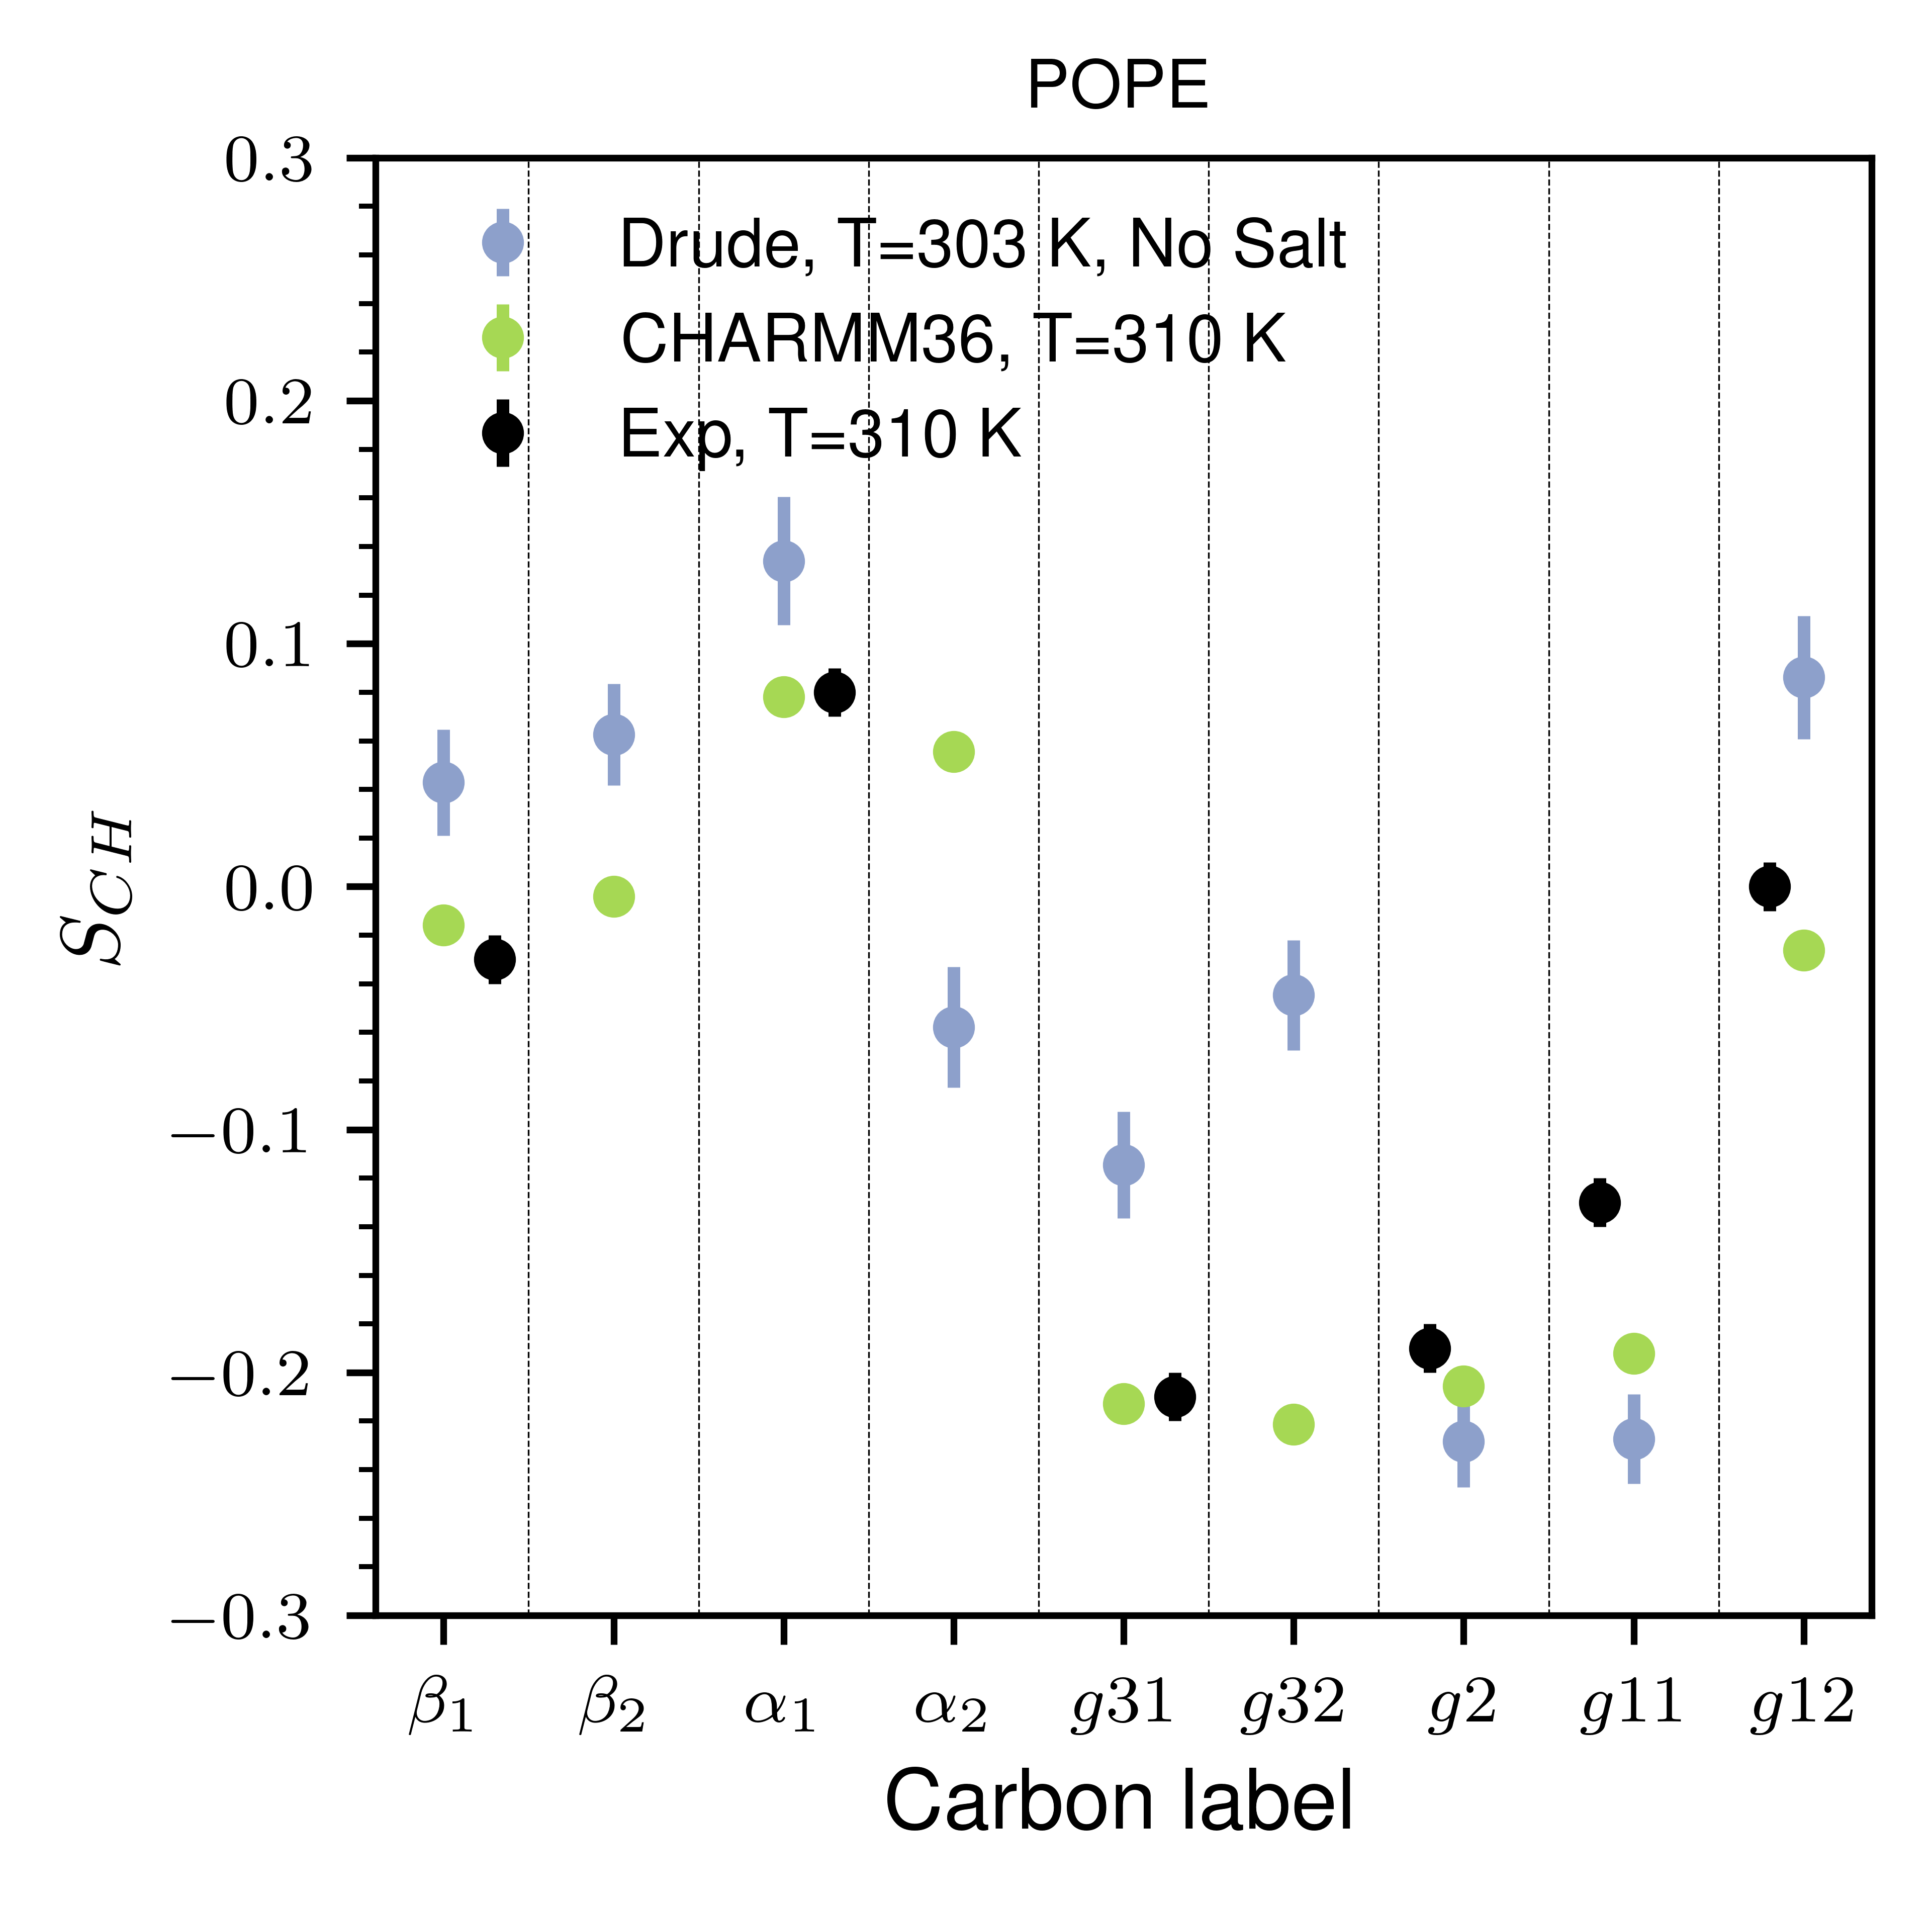

In [39]:
fig, axs = plt.subplots(figsize = (width_one_column,width_one_column), dpi = 1200, nrows = 1, ncols = 1)

plt.errorbar(headGroupGlycerolIndexPOPEX, orderParameters['pope_0'][[headGroupGlycerolIndexPOPE]][:,2].astype(float), orderParameters['pope_0'][[headGroupGlycerolIndexPOPE]][:,3].astype(float), color = color_pope_0, linestyle = '', markersize = 4, marker = 'o', label = r'Drude,~T=303~K, No Salt' )
plt.errorbar(headGroupGlycerolIndexPOPEX, pope_c36_op_y, yerr = pope_c36_op_err,color = color_pope_c36, linestyle = '', markersize = 4, marker = 'o', label = r'CHARMM36,~T=310~K' )
plt.errorbar(pope_op_exp_x-0.2, pope_op_exp_y, pope_op_exp_err,linestyle = '', markersize = 4, marker = 'o', label = r'Exp,~T=310~K', color = color_pope_exp )

plt.xticks(headGroupGlycerolIndexPOPEX,labels = orderParameterLabelsPOPE);
plt.legend(frameon=False, loc = 'upper left')
plt.ylabel(r'$S_{CH}$')
plt.xlabel(r'Carbon~label')

plt.axvline(x=0.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=1.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=2.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=3.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=4.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=5.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=6.5, color = 'k', linestyle ='--', linewidth= 0.2)
plt.axvline(x=7.5, color = 'k', linestyle ='--', linewidth= 0.2)


axs.set_ylim(-0.3,0.3)
plt.title(r"POPE")
plt.xticks([0,1,2,3,4,5,6,7,8],labels= orderParameterLabels);
axs.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))

fig.savefig('pope_order_parameters.eps', dpi = 1200, bbox_layout = 'tight')

## electrometer ##

In [21]:
## popc cacl2 c36 data ##
# from https://github.com/NMRLipids/lipid_ionINTERACTION/blob/master/Data/POPC/CaCl/CHARMM36/CHARMMcaclCONSchange.dat
## popc nacl c36 data ##
# from https://github.com/NMRLipids/lipid_ionINTERACTION/blob/master/Data/POPC/NaCl/CHARMM36/CHARMMnaclCONSchange.dat

#b1,SD  b2,SD  a1, SD  a2,SD  g11,SD  g12,SD  g2,SD  g31,SD   g32,SD

popc_cacl2_op_change = np.genfromtxt('charmm36_cacl_op_change_popc.dat', skip_header = 2)
popc_nacl_op_change = np.genfromtxt('charmm36_nacl_op_change_popc.dat', skip_header = 2)



In [22]:
# experimental data #
#                   #
# https://github.com/NMRLipids/lipid_ionINTERACTION/blob/master/Data/POPC/CaCl/EXP-Altenbach1984-T313K.dat #

#nacl = []
cacl2_alpha = np.array([[0, 6.1],[0.005, 5.76],[0.01, 5.52] ,[0.02, 5.32] ,[0.05, 5.03],[.1,4.54],[0.2, 4.00] ,[0.4, 3.13] ,[0.5, 2.73] ,[0.6, 2.39] ,[0.8 ,1.95] ,[1.0, 1.32]])
d_nacl_alpha = np.array([[0,0],[1,-0.05]]);

In [23]:
# we calculate the change_nacl in op for beta1, beta2, alpha1, and alpha2 only #

b1_op_change_nacl = np.zeros((5,2))

b1_op_change_nacl[1,0] = orderParameters['popc_350_nacl'][headGroupGlycerolIndex[0]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[0]][[2]].astype(float)
b1_op_change_nacl[2,0] = orderParameters['popc_450_nacl'][headGroupGlycerolIndex[0]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[0]][[2]].astype(float)
b1_op_change_nacl[3,0] = orderParameters['popc_650_nacl'][headGroupGlycerolIndex[0]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[0]][[2]].astype(float)
b1_op_change_nacl[4,0] = orderParameters['popc_1000_nacl'][headGroupGlycerolIndex[0]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[0]][[2]].astype(float)

b1_op_change_nacl[1,1] = np.sqrt(orderParameters['popc_350_nacl'][headGroupGlycerolIndex[0]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[0]][[3]].astype(float)**2)
b1_op_change_nacl[2,1] = np.sqrt(orderParameters['popc_450_nacl'][headGroupGlycerolIndex[0]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[0]][[3]].astype(float)**2)
b1_op_change_nacl[3,1] = np.sqrt(orderParameters['popc_650_nacl'][headGroupGlycerolIndex[0]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[0]][[3]].astype(float)**2)
b1_op_change_nacl[4,1] = np.sqrt(orderParameters['popc_1000_nacl'][headGroupGlycerolIndex[0]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[0]][[3]].astype(float)**2)


In [24]:
# we calculate the change_cacl in op for beta1, beta2, alpha1, and alpha2 only #

b1_op_change_cacl = np.zeros((5,2))

b1_op_change_cacl[1,0] = orderParameters['popc_350_cacl'][headGroupGlycerolIndex[0]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[0]][[2]].astype(float)
b1_op_change_cacl[2,0] = orderParameters['popc_450_cacl'][headGroupGlycerolIndex[0]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[0]][[2]].astype(float)
b1_op_change_cacl[3,0] = orderParameters['popc_650_cacl'][headGroupGlycerolIndex[0]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[0]][[2]].astype(float)
b1_op_change_cacl[4,0] = orderParameters['popc_1000_cacl'][headGroupGlycerolIndex[0]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[0]][[2]].astype(float)

b1_op_change_cacl[1,1] = np.sqrt(orderParameters['popc_350_cacl'][headGroupGlycerolIndex[0]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[0]][[3]].astype(float)**2)
b1_op_change_cacl[2,1] = np.sqrt(orderParameters['popc_450_cacl'][headGroupGlycerolIndex[0]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[0]][[3]].astype(float)**2)
b1_op_change_cacl[3,1] = np.sqrt(orderParameters['popc_650_cacl'][headGroupGlycerolIndex[0]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[0]][[3]].astype(float)**2)
b1_op_change_cacl[4,1] = np.sqrt(orderParameters['popc_1000_cacl'][headGroupGlycerolIndex[0]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[0]][[3]].astype(float)**2)


In [25]:
# we calculate the change_nacl in op for beta1, beta2, alpha1, and alpha2 only #

b2_op_change_nacl = np.zeros((5,2))

b2_op_change_nacl[1,0] = orderParameters['popc_350_nacl'][headGroupGlycerolIndex[1]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[1]][[2]].astype(float)
b2_op_change_nacl[2,0] = orderParameters['popc_450_nacl'][headGroupGlycerolIndex[1]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[1]][[2]].astype(float)
b2_op_change_nacl[3,0] = orderParameters['popc_650_nacl'][headGroupGlycerolIndex[1]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[1]][[2]].astype(float)
b2_op_change_nacl[4,0] = orderParameters['popc_1000_nacl'][headGroupGlycerolIndex[1]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[1]][[2]].astype(float)

b2_op_change_nacl[1,1] = np.sqrt(orderParameters['popc_350_nacl'][headGroupGlycerolIndex[1]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[1]][[3]].astype(float)**2)
b2_op_change_nacl[2,1] = np.sqrt(orderParameters['popc_450_nacl'][headGroupGlycerolIndex[1]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[1]][[3]].astype(float)**2)
b2_op_change_nacl[3,1] = np.sqrt(orderParameters['popc_650_nacl'][headGroupGlycerolIndex[1]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[1]][[3]].astype(float)**2)
b2_op_change_nacl[4,1] = np.sqrt(orderParameters['popc_1000_nacl'][headGroupGlycerolIndex[1]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[1]][[3]].astype(float)**2)


In [26]:
# we calculate the change_cacl in op for beta1, beta2, alpha1, and alpha2 only #

b2_op_change_cacl = np.zeros((5,2))

b2_op_change_cacl[1,0] = orderParameters['popc_350_cacl'][headGroupGlycerolIndex[1]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[1]][[2]].astype(float)
b2_op_change_cacl[2,0] = orderParameters['popc_450_cacl'][headGroupGlycerolIndex[1]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[1]][[2]].astype(float)
b2_op_change_cacl[3,0] = orderParameters['popc_650_cacl'][headGroupGlycerolIndex[1]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[1]][[2]].astype(float)
b2_op_change_cacl[4,0] = orderParameters['popc_1000_cacl'][headGroupGlycerolIndex[1]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[1]][[2]].astype(float)

b2_op_change_cacl[1,1] = np.sqrt(orderParameters['popc_350_cacl'][headGroupGlycerolIndex[1]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[1]][[3]].astype(float)**2)
b2_op_change_cacl[2,1] = np.sqrt(orderParameters['popc_450_cacl'][headGroupGlycerolIndex[1]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[1]][[3]].astype(float)**2)
b2_op_change_cacl[3,1] = np.sqrt(orderParameters['popc_650_cacl'][headGroupGlycerolIndex[1]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[1]][[3]].astype(float)**2)
b2_op_change_cacl[4,1] = np.sqrt(orderParameters['popc_1000_cacl'][headGroupGlycerolIndex[1]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[1]][[3]].astype(float)**2)


In [27]:
a1_op_change_nacl = np.zeros((5,2))

a1_op_change_nacl[1,0] = orderParameters['popc_350_nacl'][headGroupGlycerolIndex[2]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[2]][[2]].astype(float)
a1_op_change_nacl[2,0] = orderParameters['popc_450_nacl'][headGroupGlycerolIndex[2]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[2]][[2]].astype(float)
a1_op_change_nacl[3,0] = orderParameters['popc_650_nacl'][headGroupGlycerolIndex[2]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[2]][[2]].astype(float)
a1_op_change_nacl[4,0] = orderParameters['popc_1000_nacl'][headGroupGlycerolIndex[2]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[2]][[2]].astype(float)

a1_op_change_nacl[1,1] = np.sqrt(orderParameters['popc_350_nacl'][headGroupGlycerolIndex[2]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[2]][[3]].astype(float)**2)
a1_op_change_nacl[2,1] = np.sqrt(orderParameters['popc_450_nacl'][headGroupGlycerolIndex[2]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[2]][[3]].astype(float)**2)
a1_op_change_nacl[3,1] = np.sqrt(orderParameters['popc_650_nacl'][headGroupGlycerolIndex[2]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[2]][[3]].astype(float)**2)
a1_op_change_nacl[4,1] = np.sqrt(orderParameters['popc_1000_nacl'][headGroupGlycerolIndex[2]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[2]][[3]].astype(float)**2)

In [28]:
a1_op_change_cacl = np.zeros((5,2))

a1_op_change_cacl[1,0] = orderParameters['popc_350_cacl'][headGroupGlycerolIndex[2]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[2]][[2]].astype(float)
a1_op_change_cacl[2,0] = orderParameters['popc_450_cacl'][headGroupGlycerolIndex[2]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[2]][[2]].astype(float)
a1_op_change_cacl[3,0] = orderParameters['popc_650_cacl'][headGroupGlycerolIndex[2]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[2]][[2]].astype(float)
a1_op_change_cacl[4,0] = orderParameters['popc_1000_cacl'][headGroupGlycerolIndex[2]][[2]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[2]][[2]].astype(float)

a1_op_change_cacl[1,1] = np.sqrt(orderParameters['popc_350_cacl'][headGroupGlycerolIndex[2]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[2]][[3]].astype(float)**2)
a1_op_change_cacl[2,1] = np.sqrt(orderParameters['popc_450_cacl'][headGroupGlycerolIndex[2]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[2]][[3]].astype(float)**2)
a1_op_change_cacl[3,1] = np.sqrt(orderParameters['popc_650_cacl'][headGroupGlycerolIndex[2]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[2]][[3]].astype(float)**2)
a1_op_change_cacl[4,1] = np.sqrt(orderParameters['popc_1000_cacl'][headGroupGlycerolIndex[2]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[2]][[3]].astype(float)**2)

In [29]:
a2_op_change_nacl = np.zeros((5,2))

a2_op_change_nacl[1,0] = orderParameters['popc_350_nacl'][headGroupGlycerolIndex[3]][[3]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)
a2_op_change_nacl[2,0] = orderParameters['popc_450_nacl'][headGroupGlycerolIndex[3]][[3]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)
a2_op_change_nacl[3,0] = orderParameters['popc_650_nacl'][headGroupGlycerolIndex[3]][[3]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)
a2_op_change_nacl[4,0] = orderParameters['popc_1000_nacl'][headGroupGlycerolIndex[3]][[3]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)

a2_op_change_nacl[1,1] = np.sqrt(orderParameters['popc_350_nacl'][headGroupGlycerolIndex[3]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)**2)
a2_op_change_nacl[2,1] = np.sqrt(orderParameters['popc_450_nacl'][headGroupGlycerolIndex[3]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)**2)
a2_op_change_nacl[3,1] = np.sqrt(orderParameters['popc_650_nacl'][headGroupGlycerolIndex[3]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)**2)
a2_op_change_nacl[4,1] = np.sqrt(orderParameters['popc_1000_nacl'][headGroupGlycerolIndex[3]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)**2)

In [30]:
a2_op_change_cacl = np.zeros((5,2))

a2_op_change_cacl[1,0] = orderParameters['popc_350_cacl'][headGroupGlycerolIndex[3]][[3]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)
a2_op_change_cacl[2,0] = orderParameters['popc_450_cacl'][headGroupGlycerolIndex[3]][[3]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)
a2_op_change_cacl[3,0] = orderParameters['popc_650_cacl'][headGroupGlycerolIndex[3]][[3]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)
a2_op_change_cacl[4,0] = orderParameters['popc_1000_cacl'][headGroupGlycerolIndex[3]][[3]].astype(float) - orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)

a2_op_change_cacl[1,1] = np.sqrt(orderParameters['popc_350_cacl'][headGroupGlycerolIndex[3]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)**2)
a2_op_change_cacl[2,1] = np.sqrt(orderParameters['popc_450_cacl'][headGroupGlycerolIndex[3]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)**2)
a2_op_change_cacl[3,1] = np.sqrt(orderParameters['popc_650_cacl'][headGroupGlycerolIndex[3]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)**2)
a2_op_change_cacl[4,1] = np.sqrt(orderParameters['popc_1000_cacl'][headGroupGlycerolIndex[3]][[3]].astype(float)**2 + orderParameters['popc_0'][headGroupGlycerolIndex[3]][[3]].astype(float)**2)

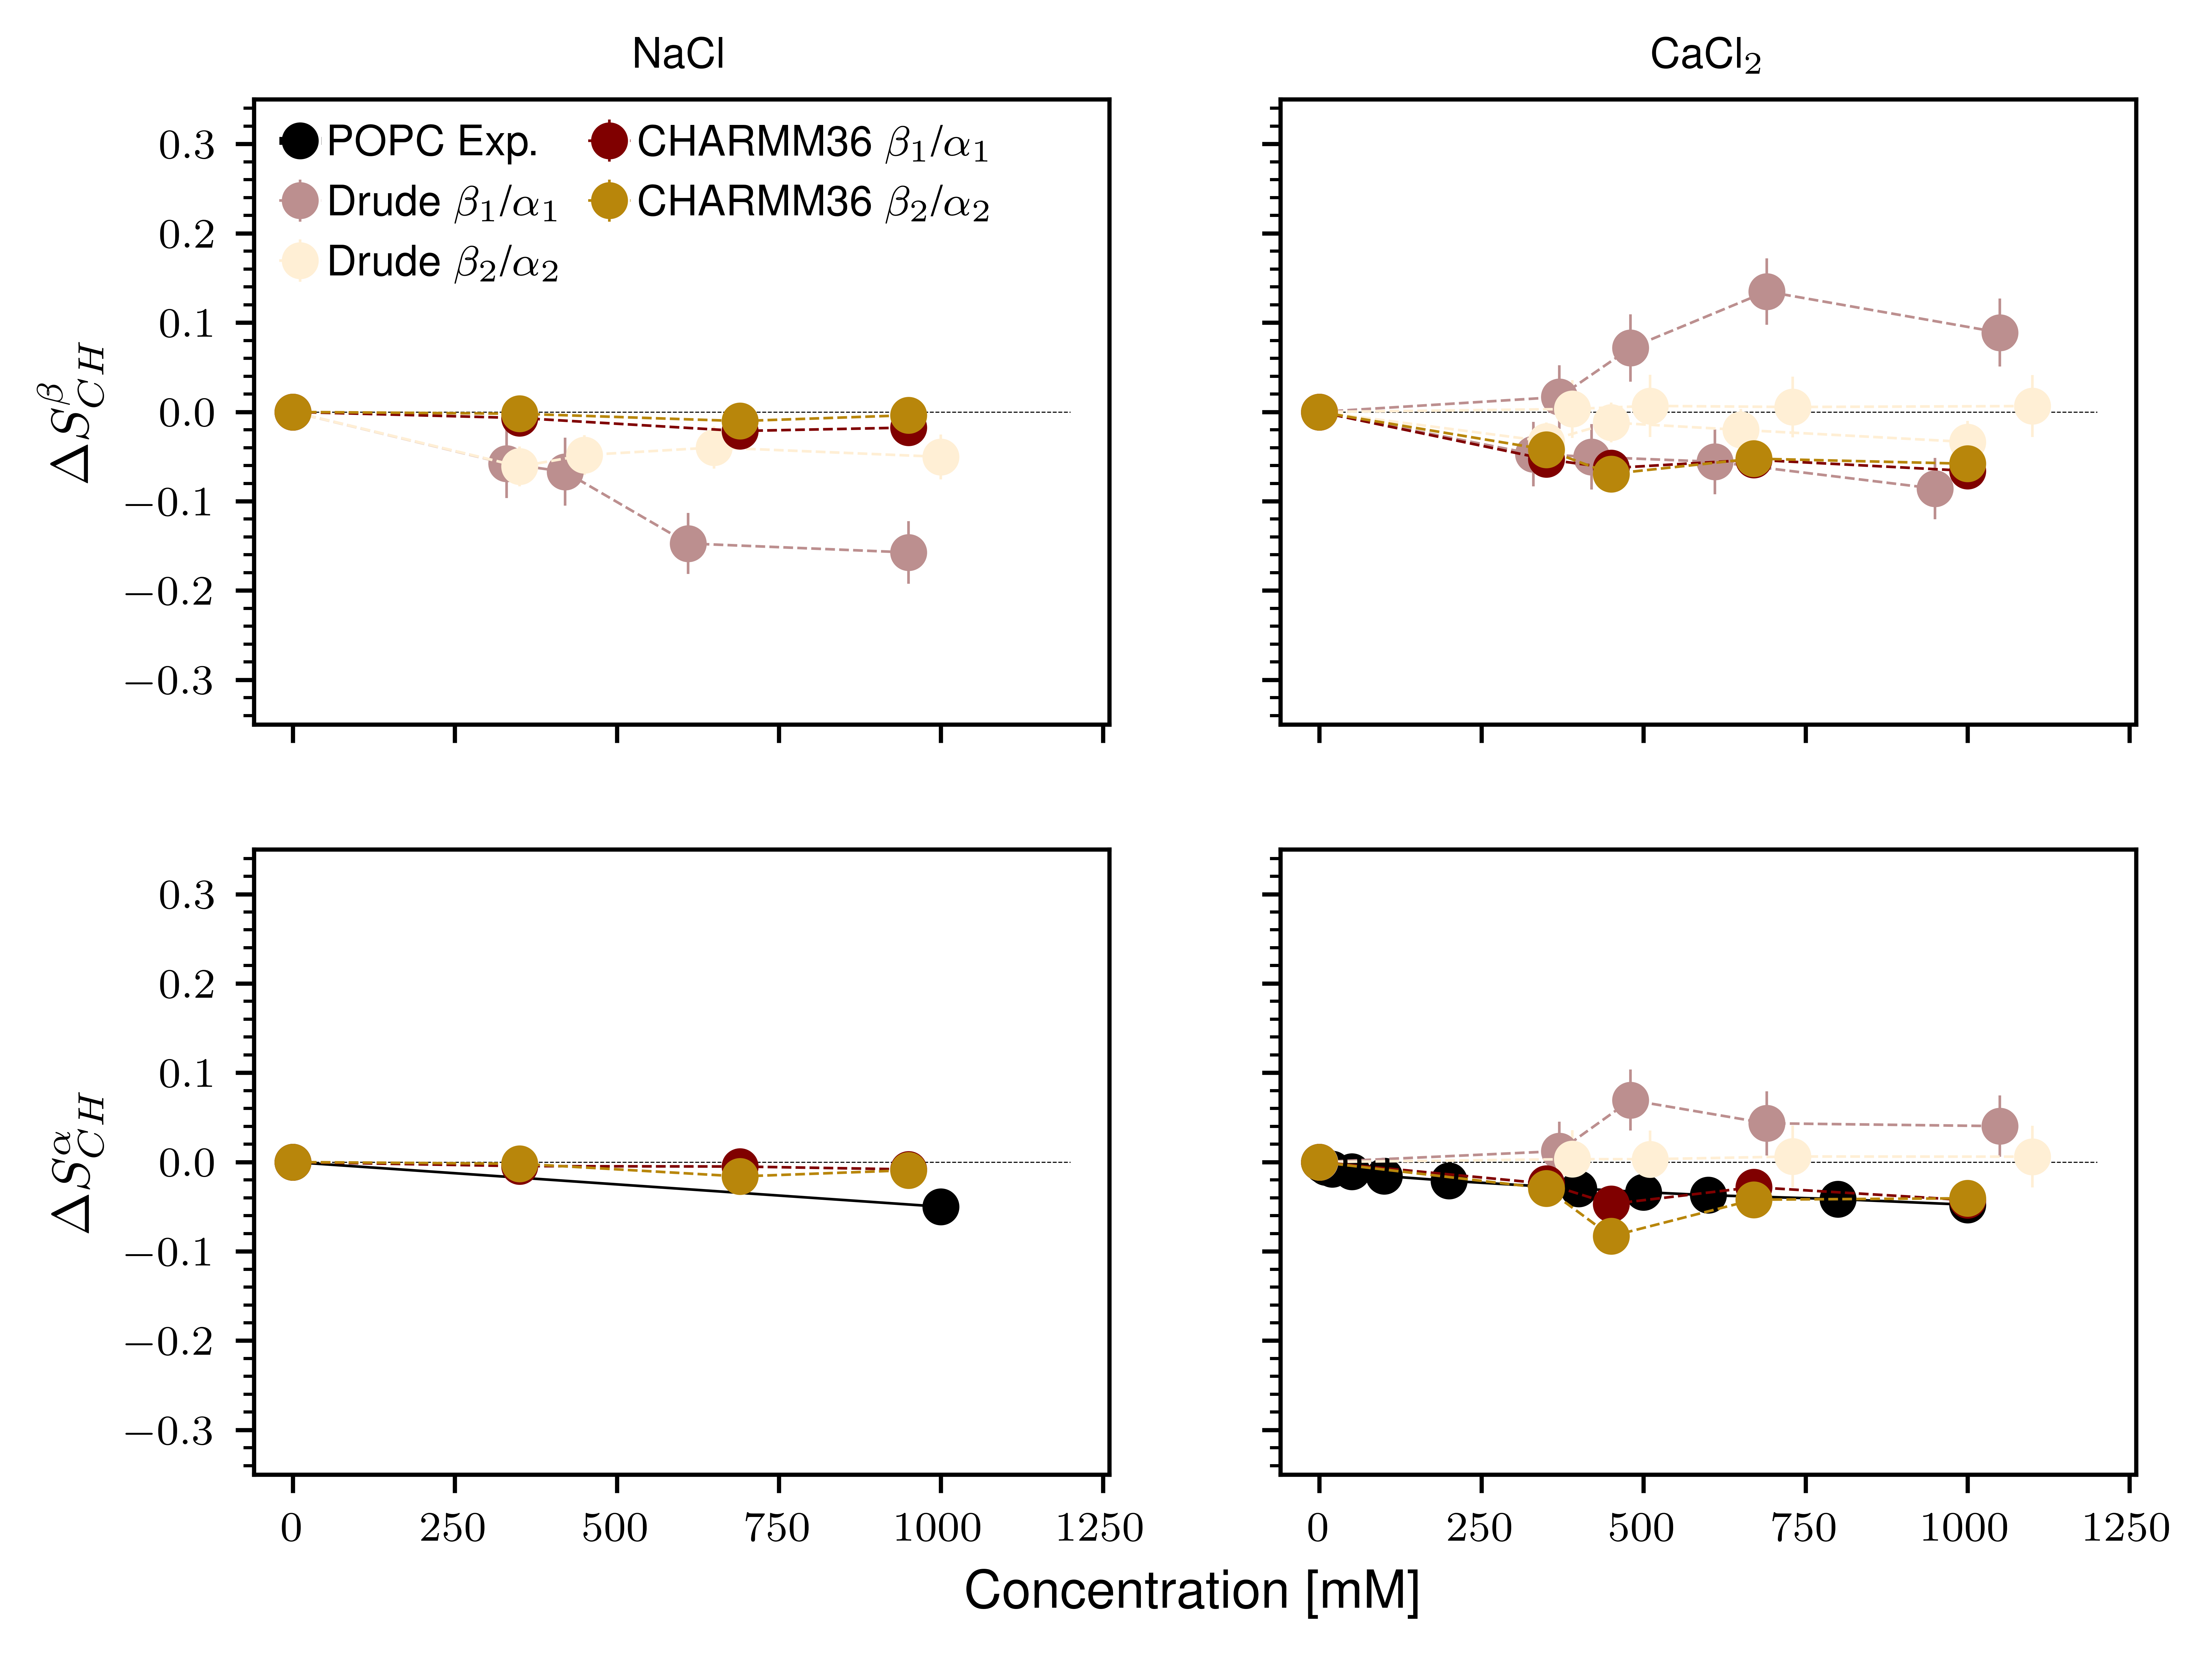

In [31]:
fig, axs = plt.subplots(figsize=(width_two_columns,1.5*width_one_column), dpi = 1200, nrows =2, ncols =2, sharex = True, sharey= True)
conc_axis = np.array([0,350,450,650,1000])
conc_axis_shift = np.array([0.1,20,30,40,50])



axs[0,0].errorbar(conc_axis - conc_axis_shift, b1_op_change_nacl[:,0], b1_op_change_nacl[:,1], linestyle = '--', marker = 'o', markersize = 6, color = 'rosybrown', label =r'Drude~$\beta_1$/$\alpha_{1}$', linewidth = 0.5)
axs[0,0].errorbar(conc_axis, b2_op_change_nacl[:,0], b2_op_change_nacl[:,1], linestyle = '--', marker = 'o', markersize = 6, color = 'papayawhip', label =r'Drude~$\beta_2$/$\alpha_{2}$', linewidth = 0.5)
axs[0,1].errorbar(conc_axis + conc_axis_shift, a1_op_change_nacl[:,0], a1_op_change_nacl[:,1], linestyle = '--', marker = 'o', markersize = 6, color = 'rosybrown', label =r'$Drude~\alpha_1$', linewidth = 0.5)
axs[0,1].errorbar(conc_axis + 2*conc_axis_shift, a2_op_change_nacl[:,0], a2_op_change_nacl[:,1], linestyle = '--', marker = 'o', markersize = 6, color = 'papayawhip', label =r'$Drude~\alpha_2$', linewidth = 0.5)
axs[0,0].plot(0,0, color = 'k', label ='POPC Exp.',linestyle = '--', marker = 'o', markersize = 6)
axs[0,0].set_ylim(-0.35,0.35)


axs[0,0].errorbar(popc_nacl_op_change[:,0],popc_nacl_op_change[:,1], popc_nacl_op_change[:,2], linestyle = '--', marker = 'o', markersize = 6, color = 'maroon', label =r'CHARMM36~$\beta_1$/$\alpha_1$', linewidth = 0.5)
axs[0,0].errorbar(popc_nacl_op_change[:,0],popc_nacl_op_change[:,3], popc_nacl_op_change[:,4], linestyle = '--', marker = 'o', markersize = 6, color = 'darkgoldenrod', label =r'CHARMM36~$\beta_2$/$\alpha_2$', linewidth = 0.5)
axs[1,0].errorbar(popc_nacl_op_change[:,0],popc_nacl_op_change[:,5], popc_nacl_op_change[:,6], linestyle = '--', marker = 'o', markersize = 6, color = 'maroon', label =r'$CHARMM36~\alpha_1$', linewidth = 0.5)
axs[1,0].errorbar(popc_nacl_op_change[:,0],popc_nacl_op_change[:,7], popc_nacl_op_change[:,8], linestyle = '--', marker = 'o', markersize = 6, color = 'darkgoldenrod', label =r'$C36~\alpha_2$', linewidth = 0.5)



axs[0,1].errorbar(conc_axis - conc_axis_shift, b1_op_change_cacl[:,0], b1_op_change_cacl[:,1], linestyle = '--', marker = 'o', markersize = 6, color = 'rosybrown', linewidth = 0.5)
axs[0,1].errorbar(conc_axis, b2_op_change_cacl[:,0], b2_op_change_cacl[:,1], linestyle = '--', marker = 'o', markersize = 6, color = 'papayawhip', linewidth = 0.5)
axs[1,1].errorbar(conc_axis + conc_axis_shift, a1_op_change_cacl[:,0], a1_op_change_cacl[:,1], linestyle = '--', marker = 'o', markersize = 6, color = 'rosybrown', linewidth = 0.5)
axs[1,1].errorbar(conc_axis + 2*conc_axis_shift, a2_op_change_cacl[:,0], a2_op_change_cacl[:,1], linestyle = '--', marker = 'o', markersize = 6, color = 'papayawhip', linewidth = 0.5)

axs[0,1].errorbar(popc_cacl2_op_change[:,0],popc_cacl2_op_change[:,1], popc_cacl2_op_change[:,2], linestyle = '--', marker = 'o', markersize = 6, color = 'maroon', linewidth = 0.5)
axs[0,1].errorbar(popc_cacl2_op_change[:,0],popc_cacl2_op_change[:,3], popc_cacl2_op_change[:,4], linestyle = '--', marker = 'o', markersize = 6, color = 'darkgoldenrod', linewidth = 0.5)
axs[1,1].errorbar(popc_cacl2_op_change[:,0],popc_cacl2_op_change[:,5], popc_cacl2_op_change[:,6], linestyle = '--', marker = 'o', markersize = 6, color = 'maroon', linewidth = 0.5)
axs[1,1].errorbar(popc_cacl2_op_change[:,0],popc_cacl2_op_change[:,7], popc_cacl2_op_change[:,8], linestyle = '--', marker = 'o', markersize = 6, color = 'darkgoldenrod', linewidth = 0.5)

axs[1,1].plot(cacl2_alpha[:,0]*1000, (cacl2_alpha[:,1]-cacl2_alpha[0,1])/100, color = 'k', markersize = 6, linewidth = 0.5, marker = 'o')

axs[1,0].plot(d_nacl_alpha[:,0]*1000, d_nacl_alpha[:,1], color ='k', markersize = 6, linewidth = 0.5, marker = 'o')

axs[0,0].set_ylabel(r'$\Delta S_{CH}^{\beta}$')
axs[1,0].set_ylabel(r'$\Delta S_{CH}^{\alpha}$')
axs[0,0].set_title(r'NaCl')
axs[0,1].set_title(r'CaCl$_{2}$')
axs[0,0].legend(frameon = False, loc= 'upper left', ncol = 2,borderpad = 0.1, handlelength = 1, columnspacing = 0.6, handletextpad = 0.2)
#
#axs[0,1].legend(frameon = False, loc = 'upper left')


axs[0,0].hlines(0,0,1200,color='k', linestyle ='--', linewidth = 0.2)
axs[1,0].hlines(0,0,1200,color='k', linestyle ='--', linewidth = 0.2)
axs[0,1].hlines(0,0,1200,color='k', linestyle ='--', linewidth = 0.2)
axs[1,1].hlines(0,0,1200,color='k', linestyle ='--', linewidth = 0.2)
axs[0,0].yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Concentration [mM]");

fig.savefig('popc_order_parameter_change.eps', dpi = 1200, bbox_layout = 'tight')

## dihedrals ##

In [45]:
#### dihedral definitions ####
Oa_Ca_Cb_NCg = {}
P_Oa_Ca_Cb = {}
Og3_P_Oa_Ca = {}
g3_Og3_P_Oa = {}
g2_g3_Og3_P = {}
g1_g2_g3_Og3 = {}


Oa_Ca_Cb_NCg['index'] = ['O12', 'C11', 'C12', 'N']
P_Oa_Ca_Cb['index'] = ['P', 'O12', 'C11', 'C12']
Og3_P_Oa_Ca['index'] = ['O11', 'P', 'O12', 'C11']
g3_Og3_P_Oa['index'] = ['C1', 'O11', 'P','O12']
g2_g3_Og3_P['index'] = ['C2', 'C1', 'O11', 'P']
g1_g2_g3_Og3['index'] = ['C3', 'C2', 'C1',' O11']

dihedral_labels = {}

dihedral_labels['0'] = r'$O\alpha -C\alpha -C\beta -NC\gamma$'
dihedral_labels['1'] = r'$P-O\alpha-C\alpha-C\beta$'
dihedral_labels['2'] = r'$Og3-P-O\alpha-C\alpha$'
dihedral_labels['3'] = r'$g3-Og3-P-O\alpha$'
dihedral_labels['4'] = r'$g2-g3-Og3-P$'
dihedral_labels['5'] = r'$g1-g2-g3-Og3$'

In [46]:
base = '/media/peptid/batu_nmrlipids/nmrlipids/drude/Data/'
path_dihedral = {}
path_dihedral['popc_0'] = base + 'dihedral/69e/b8d/69eb8db2067cbb20310a499d8cd2c9d24b36a1b5/43da5fcd64c4496538ba2f47f5b55c44fd8843ab/'
path_dihedral['popc_350_nacl'] = base + 'dihedral/4a6/16f/4a616f924cfe0af7309a7c75a75cb71f4ca4cb4b/319b20af22c0e6b576b1d48266579849cdd0ffc7/'
path_dihedral['popc_350_cacl'] = base + 'dihedral/207/347/20734787525506df5164b6e7a8e9fe158eb42d93/e69c46a7f69132e734a5dc908ef0bbfa03a91abd/'
path_dihedral['popc_450_nacl'] = base + 'dihedral/b14/342/b14342cef43c6a52dc0671e5ad19c2f44144d8f4/80f189afb6f4ccb62ef2f8329c01c0ae3d31ce5b/'
path_dihedral['popc_450_cacl'] = base + 'dihedral/05e/708/05e7087dc9959a392f9d76f1fd01cc2604138817/74ae0776f86775aa5b07e9dfe54a2e92cc752b2a/'
path_dihedral['popc_650_nacl'] = base + 'dihedral/31d/b07/31db070da5fcb5003e09f85820738b4d3e87efee/14dc9def4bb06d082a836c65deaf77a79a476edc/'
path_dihedral['popc_650_cacl'] = base + 'dihedral/d2e/6fb/d2e6fbd13e9586fae38075eeb1c388638fc1a06a/4913267ea1a9e492c593ab2b8ab3f5567f60d0f0/'
path_dihedral['popc_1000_nacl'] = base + 'dihedral/1b2/de8/1b2de8ba9cc3027f7b6c08fa9dfb49332c54b2c7/76367e896a6fb125a00434202635553eef2b23ce/'
path_dihedral['popc_1000_cacl'] = base + 'dihedral/a0e/63e/a0e63ed74f9a1f5f95ccb65e4e08666f11a4e768/9dd97262a2a41b34c09f0222a890531eabce96e6/'

In [47]:
path['pope_0'] = base + 'dihedral/a36/e34/a36e34ce37a44d5dfd753b95cbc4a1ce4b055275/0fecf2da1be19236b6c47c26b2b1ea2306246c47/'

Oa_Ca_Cb_NCg['pope-0'] = np.genfromtxt(path['pope_0'] + 'POPE_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['pope-0'] = np.genfromtxt(path['pope_0'] + 'POPE_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['pope-0'] = np.genfromtxt(path['pope_0']  + 'POPE_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['pope-0'] = np.genfromtxt(path['pope_0'] + 'POPE_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['pope-0'] = np.genfromtxt(path['pope_0'] + 'POPE_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['pope-0'] = np.genfromtxt(path['pope_0'] + 'POPE_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [48]:
Oa_Ca_Cb_NCg['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-0'] = np.genfromtxt(path_dihedral['popc_0']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [49]:
Oa_Ca_Cb_NCg['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-0'] = np.genfromtxt(path_dihedral['popc_0']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-0'] = np.genfromtxt(path_dihedral['popc_0'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [50]:
Oa_Ca_Cb_NCg['popc-350-nacl'] = np.genfromtxt(path_dihedral['popc_350_nacl'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-350-nacl'] = np.genfromtxt(path_dihedral['popc_350_nacl'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-350-nacl'] = np.genfromtxt(path_dihedral['popc_350_nacl']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-350-nacl'] = np.genfromtxt(path_dihedral['popc_350_nacl'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-350-nacl'] = np.genfromtxt(path_dihedral['popc_350_nacl'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-350-nacl'] = np.genfromtxt(path_dihedral['popc_350_nacl'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [51]:
Oa_Ca_Cb_NCg['popc-350-cacl'] = np.genfromtxt(path_dihedral['popc_350_cacl'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-350-cacl'] = np.genfromtxt(path_dihedral['popc_350_cacl'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-350-cacl'] = np.genfromtxt(path_dihedral['popc_350_cacl']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-350-cacl'] = np.genfromtxt(path_dihedral['popc_350_cacl'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-350-cacl'] = np.genfromtxt(path_dihedral['popc_350_cacl'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-350-cacl'] = np.genfromtxt(path_dihedral['popc_350_cacl'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [52]:
Oa_Ca_Cb_NCg['popc-450-nacl'] = np.genfromtxt(path_dihedral['popc_450_nacl'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-450-nacl'] = np.genfromtxt(path_dihedral['popc_450_nacl'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-450-nacl'] = np.genfromtxt(path_dihedral['popc_450_nacl']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-450-nacl'] = np.genfromtxt(path_dihedral['popc_450_nacl'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-450-nacl'] = np.genfromtxt(path_dihedral['popc_450_nacl'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-450-nacl'] = np.genfromtxt(path_dihedral['popc_450_nacl'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [53]:
Oa_Ca_Cb_NCg['popc-450-cacl'] = np.genfromtxt(path_dihedral['popc_450_cacl'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-450-cacl'] = np.genfromtxt(path_dihedral['popc_450_cacl'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-450-cacl'] = np.genfromtxt(path_dihedral['popc_450_cacl']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-450-cacl'] = np.genfromtxt(path_dihedral['popc_450_cacl'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-450-cacl'] = np.genfromtxt(path_dihedral['popc_450_cacl'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-450-cacl'] = np.genfromtxt(path_dihedral['popc_450_cacl'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [54]:
Oa_Ca_Cb_NCg['popc-650-nacl'] = np.genfromtxt(path_dihedral['popc_650_nacl'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-650-nacl'] = np.genfromtxt(path_dihedral['popc_650_nacl'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-650-nacl'] = np.genfromtxt(path_dihedral['popc_650_nacl']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-650-nacl'] = np.genfromtxt(path_dihedral['popc_650_nacl'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-650-nacl'] = np.genfromtxt(path_dihedral['popc_650_nacl'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-650-nacl'] = np.genfromtxt(path_dihedral['popc_650_nacl'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [55]:
Oa_Ca_Cb_NCg['popc-650-cacl'] = np.genfromtxt(path_dihedral['popc_650_cacl'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-650-cacl'] = np.genfromtxt(path_dihedral['popc_650_cacl'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-650-cacl'] = np.genfromtxt(path_dihedral['popc_650_cacl']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-650-cacl'] = np.genfromtxt(path_dihedral['popc_650_cacl'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-650-cacl'] = np.genfromtxt(path_dihedral['popc_650_cacl'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-650-cacl'] = np.genfromtxt(path_dihedral['popc_650_cacl'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [56]:
Oa_Ca_Cb_NCg['popc-1000-nacl'] = np.genfromtxt(path_dihedral['popc_1000_nacl'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-1000-nacl'] = np.genfromtxt(path_dihedral['popc_1000_nacl'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-1000-nacl'] = np.genfromtxt(path_dihedral['popc_1000_nacl']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-1000-nacl'] = np.genfromtxt(path_dihedral['popc_1000_nacl'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-1000-nacl'] = np.genfromtxt(path_dihedral['popc_1000_nacl'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-1000-nacl'] = np.genfromtxt(path_dihedral['popc_1000_nacl'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [57]:
Oa_Ca_Cb_NCg['popc-1000-cacl'] = np.genfromtxt(path_dihedral['popc_1000_cacl'] + 'POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M.dat')
P_Oa_Ca_Cb['popc-1000-cacl'] = np.genfromtxt(path_dihedral['popc_1000_cacl'] + 'POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M.dat')
Og3_P_Oa_Ca['popc-1000-cacl'] = np.genfromtxt(path_dihedral['popc_1000_cacl']  + 'POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M.dat')
g3_Og3_P_Oa['popc-1000-cacl'] = np.genfromtxt(path_dihedral['popc_1000_cacl'] + 'POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M.dat')
g2_g3_Og3_P['popc-1000-cacl'] = np.genfromtxt(path_dihedral['popc_1000_cacl'] + 'POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M.dat')
g1_g2_g3_Og3['popc-1000-cacl'] = np.genfromtxt(path_dihedral['popc_1000_cacl'] + 'POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M.dat')

In [58]:
#### POPC C36 Data from ####
# https://github.com/NMRLipids/NMRlipidsIVPEandPG/tree/master/Data/dihedral/edf/8a8/edf8a82ed02a87f84c14b740c90dfa718d3f7f8b/1048c4444299bb5adb360e7e17df2b616ab7a4fc #
############################

Oa_Ca_Cb_NCg['popc-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/edf/8a8/edf8a82ed02a87f84c14b740c90dfa718d3f7f8b/1048c4444299bb5adb360e7e17df2b616ab7a4fc/POPC_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M_0-360.xvg', delimiter = ' ').to_numpy()
P_Oa_Ca_Cb['popc-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/edf/8a8/edf8a82ed02a87f84c14b740c90dfa718d3f7f8b/1048c4444299bb5adb360e7e17df2b616ab7a4fc/POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M_0-360.xvg', delimiter = ' ').to_numpy()
Og3_P_Oa_Ca['popc-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/edf/8a8/edf8a82ed02a87f84c14b740c90dfa718d3f7f8b/1048c4444299bb5adb360e7e17df2b616ab7a4fc/POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M_0-360.xvg', delimiter = ' ').to_numpy()
g3_Og3_P_Oa['popc-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/edf/8a8/edf8a82ed02a87f84c14b740c90dfa718d3f7f8b/1048c4444299bb5adb360e7e17df2b616ab7a4fc/POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M_0-360.xvg', delimiter = ' ').to_numpy()
g2_g3_Og3_P['popc-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/edf/8a8/edf8a82ed02a87f84c14b740c90dfa718d3f7f8b/1048c4444299bb5adb360e7e17df2b616ab7a4fc/POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M_0-360.xvg', delimiter = ' ').to_numpy()
g1_g2_g3_Og3['popc-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/edf/8a8/edf8a82ed02a87f84c14b740c90dfa718d3f7f8b/1048c4444299bb5adb360e7e17df2b616ab7a4fc/POPC_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M_0-360.xvg', delimiter = ' ').to_numpy()

In [59]:
#### POPE C36 Data from ####
# https://github.com/NMRLipids/NMRlipidsIVPEandPG/tree/master/Data/dihedral/2d4/61b/2d461bc9d828af155146162ef42438974e4cbeaf/c8ce4cc36ef6ec7a085cf011176a92d9d746a792 #
############################

Oa_Ca_Cb_NCg['pope-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/2d4/61b/2d461bc9d828af155146162ef42438974e4cbeaf/c8ce4cc36ef6ec7a085cf011176a92d9d746a792/POPE_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M_0-360.xvg', delimiter = ' ').to_numpy()
P_Oa_Ca_Cb['pope-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/2d4/61b/2d461bc9d828af155146162ef42438974e4cbeaf/c8ce4cc36ef6ec7a085cf011176a92d9d746a792/POPE_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M_0-360.xvg', delimiter = ' ').to_numpy()
Og3_P_Oa_Ca['pope-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/2d4/61b/2d461bc9d828af155146162ef42438974e4cbeaf/c8ce4cc36ef6ec7a085cf011176a92d9d746a792/POPE_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M_0-360.xvg', delimiter = ' ').to_numpy()
g3_Og3_P_Oa['pope-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/2d4/61b/2d461bc9d828af155146162ef42438974e4cbeaf/c8ce4cc36ef6ec7a085cf011176a92d9d746a792/POPE_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M_0-360.xvg', delimiter = ' ').to_numpy()
g2_g3_Og3_P['pope-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/2d4/61b/2d461bc9d828af155146162ef42438974e4cbeaf/c8ce4cc36ef6ec7a085cf011176a92d9d746a792/POPE_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M_0-360.xvg', delimiter = ' ').to_numpy()
g1_g2_g3_Og3['pope-charmm'] = pd.read_csv('https://raw.githubusercontent.com/NMRLipids/NMRlipidsIVPEandPG/master/Data/dihedral/2d4/61b/2d461bc9d828af155146162ef42438974e4cbeaf/c8ce4cc36ef6ec7a085cf011176a92d9d746a792/POPE_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M_0-360.xvg', delimiter = ' ').to_numpy()


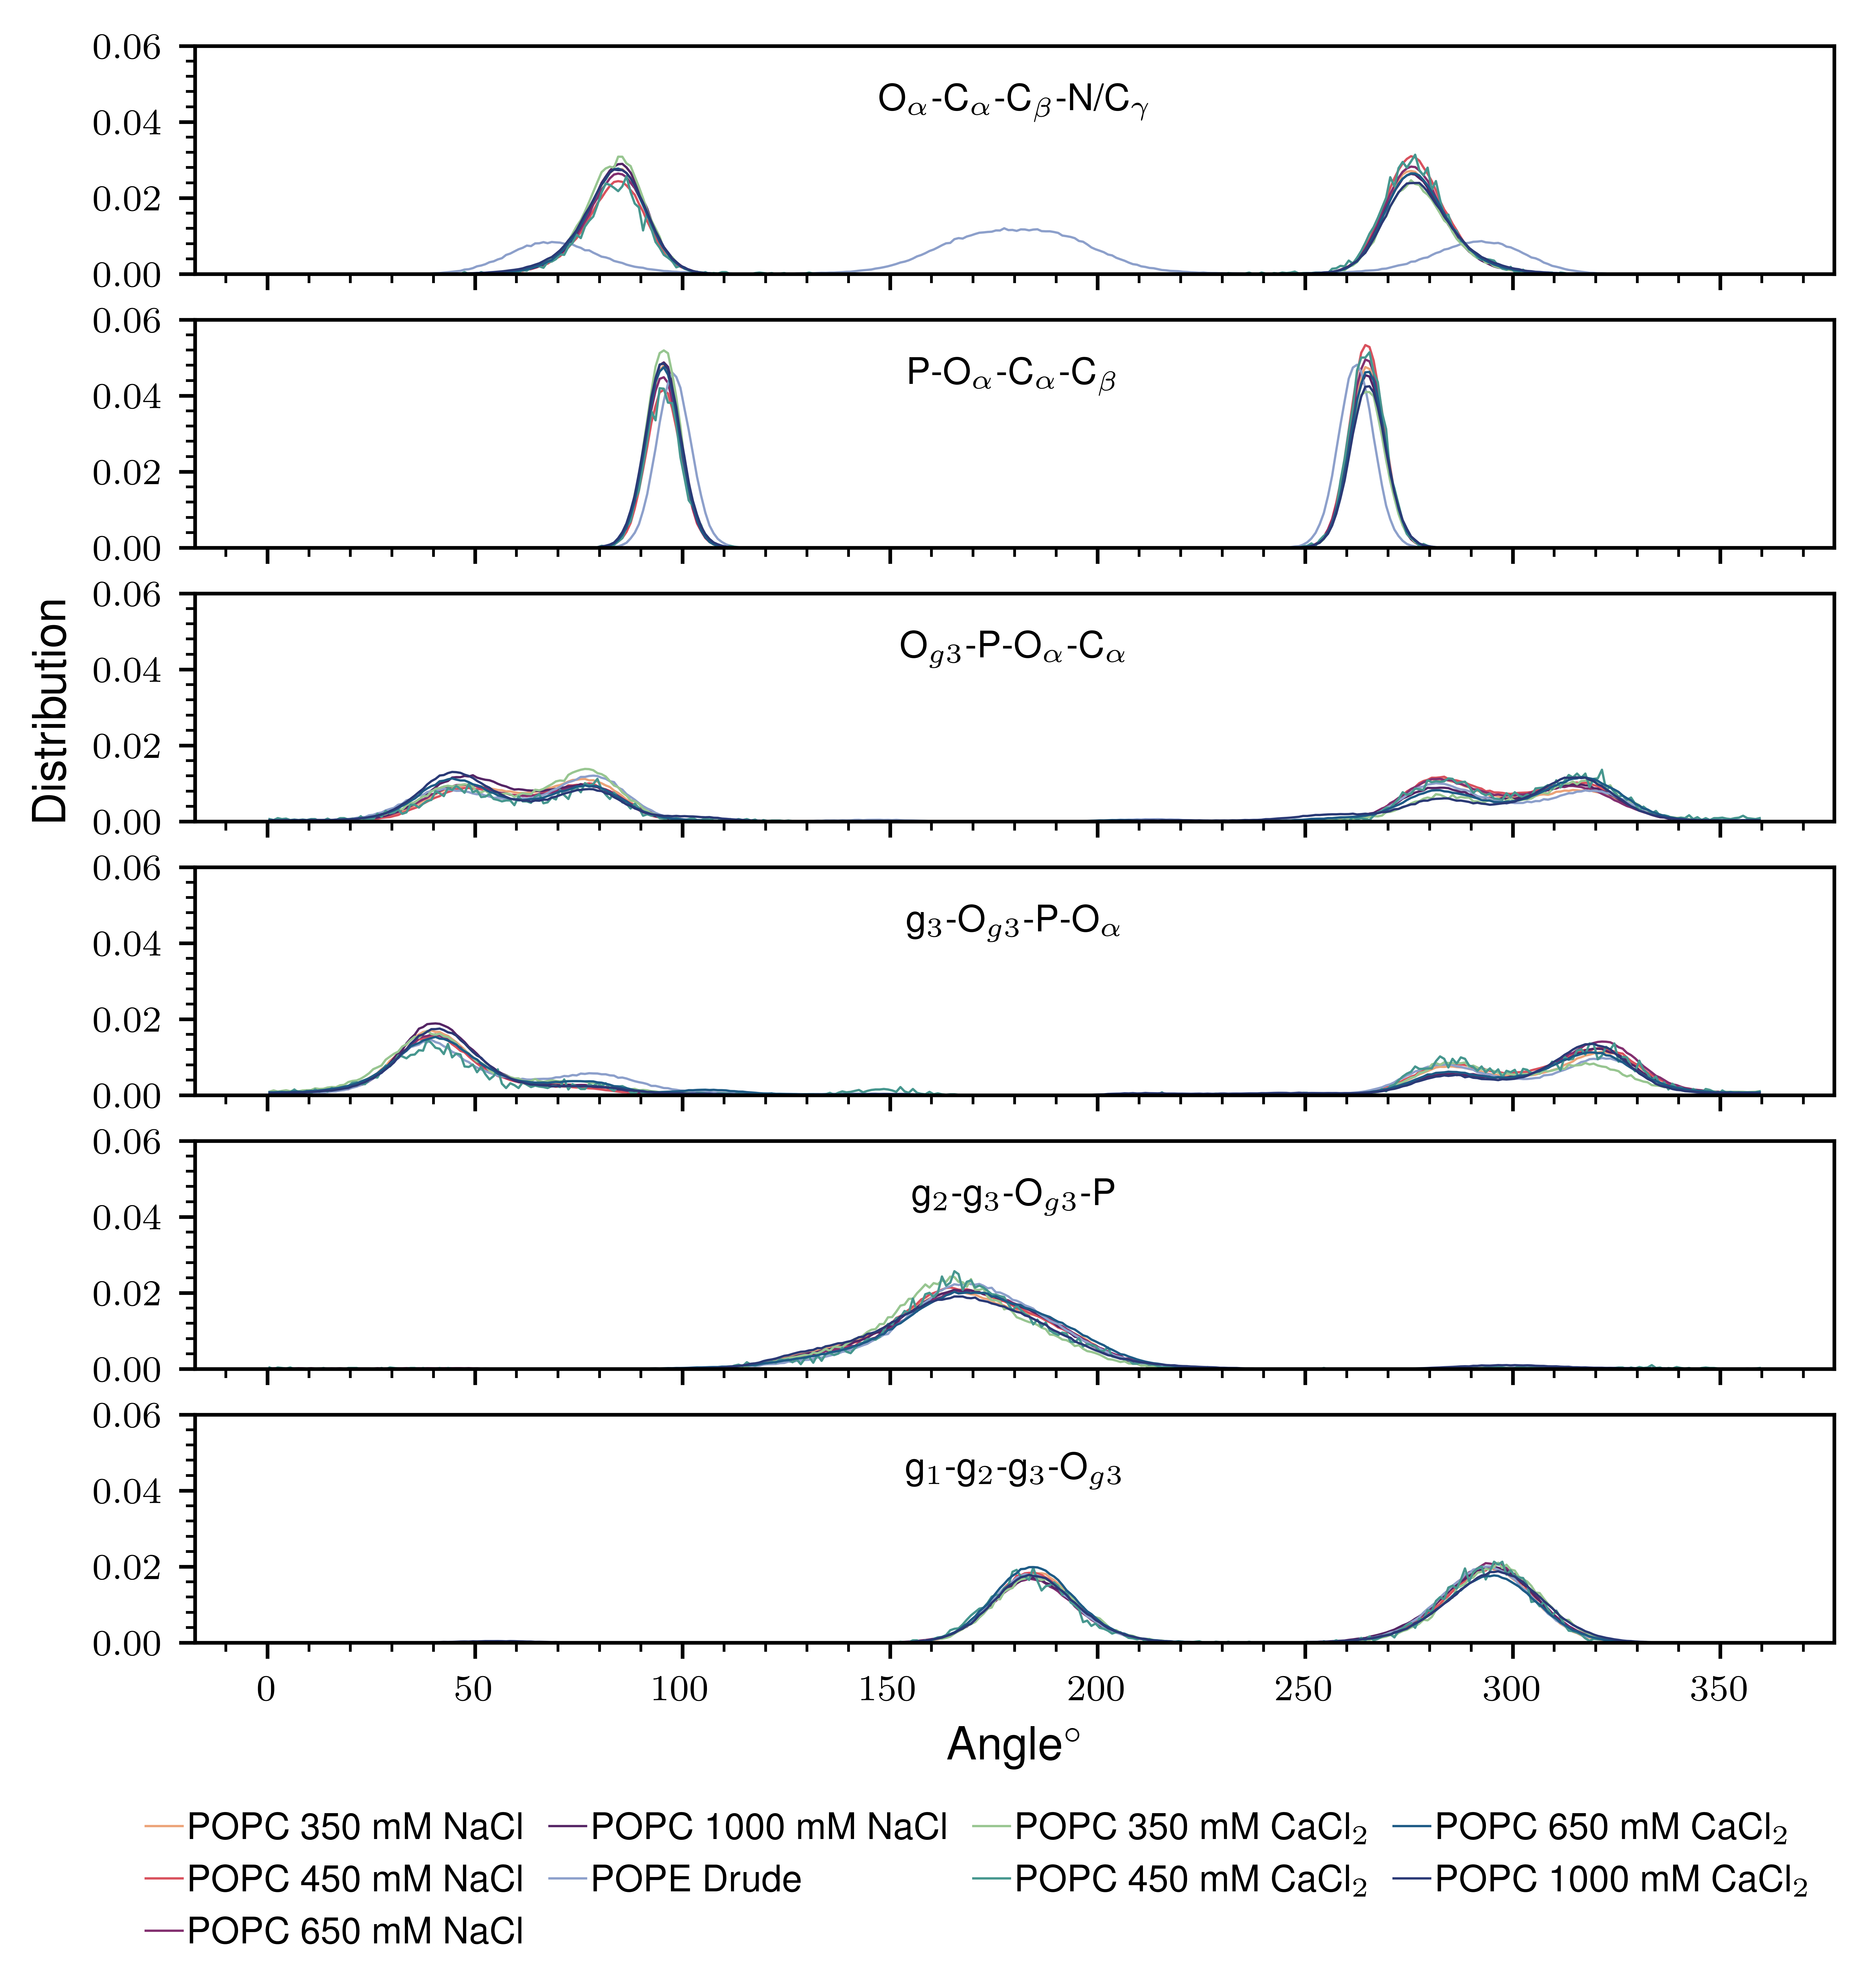

In [60]:

# This could go into the SI #

fig, axs = plt.subplots(figsize = (width_two_columns, width_two_columns), ncols = 1, nrows = 6, dpi = 1200, sharex = True, sharey = True)

axs[0].plot(Oa_Ca_Cb_NCg['popc-350-nacl'][:,0], Oa_Ca_Cb_NCg['popc-350-nacl'][:,1], color = color_popc_350_nacl, label = r'POPC 350 mM NaCl', linewidth = 0.5)
axs[0].plot(Oa_Ca_Cb_NCg['popc-450-nacl'][:,0], Oa_Ca_Cb_NCg['popc-450-nacl'][:,1], color = color_popc_450_nacl, label = r'POPC 450 mM NaCl', linewidth = 0.5)
axs[0].plot(Oa_Ca_Cb_NCg['popc-650-nacl'][:,0], Oa_Ca_Cb_NCg['popc-650-nacl'][:,1], color = color_popc_650_nacl, label = r'POPC 650 mM NaCl', linewidth = 0.5)
axs[0].plot(Oa_Ca_Cb_NCg['popc-1000-nacl'][:,0], Oa_Ca_Cb_NCg['popc-1000-nacl'][:,1], color = color_popc_1000_nacl, label = r'POPC 1000 mM NaCl', linewidth = 0.5)
axs[0].plot(Oa_Ca_Cb_NCg['pope-0'][:,0], Oa_Ca_Cb_NCg['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 0.5)

axs[1].plot(P_Oa_Ca_Cb['popc-350-nacl'][:,0], P_Oa_Ca_Cb['popc-350-nacl'][:,1], color = color_popc_350_nacl, label = r'POPC 350 mM NaCl', linewidth = 0.5)
axs[1].plot(P_Oa_Ca_Cb['popc-450-nacl'][:,0], P_Oa_Ca_Cb['popc-450-nacl'][:,1], color = color_popc_450_nacl, label = r'POPC 450 mM NaCl', linewidth = 0.5)
axs[1].plot(P_Oa_Ca_Cb['popc-650-nacl'][:,0], P_Oa_Ca_Cb['popc-650-nacl'][:,1], color = color_popc_650_nacl, label = r'POPC 650 mM NaCl', linewidth = 0.5)
axs[1].plot(P_Oa_Ca_Cb['popc-1000-nacl'][:,0], P_Oa_Ca_Cb['popc-1000-nacl'][:,1], color = color_popc_1000_nacl, label = r'POPC 1000 mM NaCl', linewidth = 0.5)
axs[1].plot(P_Oa_Ca_Cb['pope-0'][:,0], P_Oa_Ca_Cb['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 0.5)

axs[2].plot(Og3_P_Oa_Ca['popc-350-nacl'][:,0], Og3_P_Oa_Ca['popc-350-nacl'][:,1], color = color_popc_350_nacl, label = r'POPC 350 mM NaCl', linewidth = 0.5)
axs[2].plot(Og3_P_Oa_Ca['popc-450-nacl'][:,0], Og3_P_Oa_Ca['popc-450-nacl'][:,1], color = color_popc_450_nacl, label = r'POPC 450 mM NaCl', linewidth = 0.5)
axs[2].plot(Og3_P_Oa_Ca['popc-650-nacl'][:,0], Og3_P_Oa_Ca['popc-650-nacl'][:,1], color = color_popc_650_nacl, label = r'POPC 650 mM NaCl', linewidth = 0.5)
axs[2].plot(Og3_P_Oa_Ca['popc-1000-nacl'][:,0], Og3_P_Oa_Ca['popc-1000-nacl'][:,1], color = color_popc_1000_nacl, label = r'POPC 1000 mM NaCl', linewidth = 0.5)
axs[2].plot(Og3_P_Oa_Ca['pope-0'][:,0], Og3_P_Oa_Ca['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 0.5)

axs[3].plot(g3_Og3_P_Oa['popc-350-nacl'][:,0], g3_Og3_P_Oa['popc-350-nacl'][:,1], color = color_popc_350_nacl, label = r'POPC 350 mM NaCl', linewidth = 0.5)
axs[3].plot(g3_Og3_P_Oa['popc-450-nacl'][:,0], g3_Og3_P_Oa['popc-450-nacl'][:,1], color = color_popc_450_nacl, label = r'POPC 450 mM NaCl', linewidth = 0.5)
axs[3].plot(g3_Og3_P_Oa['popc-650-nacl'][:,0], g3_Og3_P_Oa['popc-650-nacl'][:,1], color = color_popc_650_nacl, label = r'POPC 650 mM NaCl', linewidth = 0.5)
axs[3].plot(g3_Og3_P_Oa['popc-1000-nacl'][:,0], g3_Og3_P_Oa['popc-1000-nacl'][:,1], color = color_popc_1000_nacl, label = r'POPC 1000 mM NaCl', linewidth = 0.5)
axs[3].plot(g3_Og3_P_Oa['pope-0'][:,0], g3_Og3_P_Oa['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 0.5)

axs[4].plot(g2_g3_Og3_P['popc-350-nacl'][:,0], g2_g3_Og3_P['popc-350-nacl'][:,1], color = color_popc_350_nacl, label = r'POPC 350 mM NaCl', linewidth = 0.5)
axs[4].plot(g2_g3_Og3_P['popc-450-nacl'][:,0], g2_g3_Og3_P['popc-450-nacl'][:,1], color = color_popc_450_nacl, label = r'POPC 450 mM NaCl', linewidth = 0.5)
axs[4].plot(g2_g3_Og3_P['popc-650-nacl'][:,0], g2_g3_Og3_P['popc-650-nacl'][:,1], color = color_popc_650_nacl, label = r'POPC 650 mM NaCl', linewidth = 0.5)
axs[4].plot(g2_g3_Og3_P['popc-1000-nacl'][:,0], g2_g3_Og3_P['popc-1000-nacl'][:,1], color = color_popc_1000_nacl, label = r'POPC 1000 mM NaCl', linewidth = 0.5)
axs[4].plot(g2_g3_Og3_P['pope-0'][:,0], g2_g3_Og3_P['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 0.5)

axs[5].plot(g1_g2_g3_Og3['popc-350-nacl'][:,0], g1_g2_g3_Og3['popc-350-nacl'][:,1], color = color_popc_350_nacl, label = r'POPC 350 mM NaCl', linewidth = 0.5)
axs[5].plot(g1_g2_g3_Og3['popc-450-nacl'][:,0], g1_g2_g3_Og3['popc-450-nacl'][:,1], color = color_popc_450_nacl, label = r'POPC 450 mM NaCl', linewidth = 0.5)
axs[5].plot(g1_g2_g3_Og3['popc-650-nacl'][:,0], g1_g2_g3_Og3['popc-650-nacl'][:,1], color = color_popc_650_nacl, label = r'POPC 650 mM NaCl', linewidth = 0.5)
axs[5].plot(g1_g2_g3_Og3['popc-1000-nacl'][:,0], g1_g2_g3_Og3['popc-1000-nacl'][:,1], color = color_popc_1000_nacl, label = r'POPC 1000 mM NaCl', linewidth = 0.5)
axs[5].plot(g1_g2_g3_Og3['pope-0'][:,0], g1_g2_g3_Og3['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 0.5)

axs[0].plot(Oa_Ca_Cb_NCg['popc-350-cacl'][:,0], Oa_Ca_Cb_NCg['popc-350-cacl'][:,1], color = color_popc_350_cacl, label = r'POPC 350 mM CaCl$_{2}$', linewidth = 0.5)
axs[0].plot(Oa_Ca_Cb_NCg['popc-450-cacl'][:,0], Oa_Ca_Cb_NCg['popc-450-cacl'][:,1], color = color_popc_450_cacl, label = r'POPC 450 mM CaCl$_{2}$', linewidth = 0.5)
axs[0].plot(Oa_Ca_Cb_NCg['popc-650-cacl'][:,0], Oa_Ca_Cb_NCg['popc-650-cacl'][:,1], color = color_popc_650_cacl, label = r'POPC 650 mM CaCl$_{2}$', linewidth = 0.5)
axs[0].plot(Oa_Ca_Cb_NCg['popc-1000-cacl'][:,0], Oa_Ca_Cb_NCg['popc-1000-cacl'][:,1], color = color_popc_1000_cacl, label = r'POPC 1000 mM CaCl$_{2}$', linewidth = 0.5)

axs[1].plot(P_Oa_Ca_Cb['popc-350-cacl'][:,0], P_Oa_Ca_Cb['popc-350-cacl'][:,1], color = color_popc_350_cacl, label = r'POPC 350 mM CaCl$_{2}$', linewidth = 0.5)
axs[1].plot(P_Oa_Ca_Cb['popc-450-cacl'][:,0], P_Oa_Ca_Cb['popc-450-cacl'][:,1], color = color_popc_450_cacl, label = r'POPC 450 mM CaCl$_{2}$', linewidth = 0.5)
axs[1].plot(P_Oa_Ca_Cb['popc-650-cacl'][:,0], P_Oa_Ca_Cb['popc-650-cacl'][:,1], color = color_popc_650_cacl, label = r'POPC 650 mM CaCl$_{2}$', linewidth = 0.5)
axs[1].plot(P_Oa_Ca_Cb['popc-1000-cacl'][:,0], P_Oa_Ca_Cb['popc-1000-cacl'][:,1], color = color_popc_1000_cacl, label = r'POPC 1000 mM CaCl$_{2}$', linewidth = 0.5)

axs[2].plot(Og3_P_Oa_Ca['popc-350-cacl'][:,0], Og3_P_Oa_Ca['popc-350-cacl'][:,1], color = color_popc_350_cacl, label = r'POPC 350 mM CaCl$_{2}$', linewidth = 0.5)
axs[2].plot(Og3_P_Oa_Ca['popc-450-cacl'][:,0], Og3_P_Oa_Ca['popc-450-cacl'][:,1], color = color_popc_450_cacl, label = r'POPC 450 mM CaCl$_{2}$', linewidth = 0.5)
axs[2].plot(Og3_P_Oa_Ca['popc-650-cacl'][:,0], Og3_P_Oa_Ca['popc-650-cacl'][:,1], color = color_popc_650_cacl, label = r'POPC 650 mM CaCl$_{2}$', linewidth = 0.5)
axs[2].plot(Og3_P_Oa_Ca['popc-1000-cacl'][:,0], Og3_P_Oa_Ca['popc-1000-cacl'][:,1], color = color_popc_1000_cacl, label = r'POPC 1000 mM CaCl$_{2}$', linewidth = 0.5)

axs[3].plot(g3_Og3_P_Oa['popc-350-cacl'][:,0], g3_Og3_P_Oa['popc-350-cacl'][:,1], color = color_popc_350_cacl, label = r'POPC 350 mM CaCl$_{2}$', linewidth = 0.5)
axs[3].plot(g3_Og3_P_Oa['popc-450-cacl'][:,0], g3_Og3_P_Oa['popc-450-cacl'][:,1], color = color_popc_450_cacl, label = r'POPC 450 mM CaCl$_{2}$', linewidth = 0.5)
axs[3].plot(g3_Og3_P_Oa['popc-650-cacl'][:,0], g3_Og3_P_Oa['popc-650-cacl'][:,1], color = color_popc_650_cacl, label = r'POPC 650 mM CaCl$_{2}$', linewidth = 0.5)
axs[3].plot(g3_Og3_P_Oa['popc-1000-cacl'][:,0], g3_Og3_P_Oa['popc-1000-cacl'][:,1], color = color_popc_1000_cacl, label = r'POPC 1000 mM CaCl$_{2}$', linewidth = 0.5)

axs[4].plot(g2_g3_Og3_P['popc-350-cacl'][:,0], g2_g3_Og3_P['popc-350-cacl'][:,1], color = color_popc_350_cacl, label = r'POPC 350 mM CaCl$_{2}$', linewidth = 0.5)
axs[4].plot(g2_g3_Og3_P['popc-450-cacl'][:,0], g2_g3_Og3_P['popc-450-cacl'][:,1], color = color_popc_450_cacl, label = r'POPC 450 mM CaCl$_{2}$', linewidth = 0.5)
axs[4].plot(g2_g3_Og3_P['popc-650-cacl'][:,0], g2_g3_Og3_P['popc-650-cacl'][:,1], color = color_popc_650_cacl, label = r'POPC 650 mM CaCl$_{2}$', linewidth = 0.5)
axs[4].plot(g2_g3_Og3_P['popc-1000-cacl'][:,0], g2_g3_Og3_P['popc-1000-cacl'][:,1], color = color_popc_1000_cacl, label = r'POPC 1000 mM CaCl$_{2}$', linewidth = 0.5)

axs[5].plot(g1_g2_g3_Og3['popc-350-cacl'][:,0], g1_g2_g3_Og3['popc-350-cacl'][:,1], color = color_popc_350_cacl, label = r'POPC 350 mM CaCl$_{2}$', linewidth = 0.5)
axs[5].plot(g1_g2_g3_Og3['popc-450-cacl'][:,0], g1_g2_g3_Og3['popc-450-cacl'][:,1], color = color_popc_450_cacl, label = r'POPC 450 mM CaCl$_{2}$', linewidth = 0.5)
axs[5].plot(g1_g2_g3_Og3['popc-650-cacl'][:,0], g1_g2_g3_Og3['popc-650-cacl'][:,1], color = color_popc_650_cacl, label = r'POPC 650 mM CaCl$_{2}$', linewidth = 0.5)
axs[5].plot(g1_g2_g3_Og3['popc-1000-cacl'][:,0], g1_g2_g3_Og3['popc-1000-cacl'][:,1], color = color_popc_1000_cacl, label = r'POPC 1000 mM CaCl$_{2}$', linewidth = 0.5)


axs[0].set_title(r'O$_{\alpha}$-C$_{\alpha}$-C$_{\beta}$-N/C$_{\gamma}$',y=1.0, pad=-14);
axs[1].set_title(r'P-O$_{\alpha}$-C$_{\alpha}$-C$_{\beta}$',y=1.0, pad=-14);
axs[2].set_title(r'O$_{g3}$-P-O$_{\alpha}$-C$_{\alpha}$',y=1.0, pad=-14);
axs[3].set_title(r'g$_{3}$-O$_{g3}$-P-O$_{\alpha}$',y=1.0, pad=-14);
axs[4].set_title(r'g$_{2}$-g$_{3}$-O$_{g3}$-P',y=1.0, pad=-14);
axs[5].set_title(r'g$_{1}$-g$_{2}$-g$_{3}$-O$_{g3}$',y=1.0, pad=-14);

axs[0].yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
axs[0].xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
axs[0].set_ylim(0,0.06)
axs[5].set_xlabel(r'Angle$^{\circ}$')
axs[2].set_ylabel('Distribution')
axs[5].legend(frameon = False, ncol = 4, bbox_to_anchor=[1.0,-0.65],borderpad = 0.1, handlelength = 1, columnspacing = 0.6, handletextpad = 0.2)
fig.savefig('dihedral_distributions_for_all.eps', dpi = 1200, bbox_layout = 'tight')

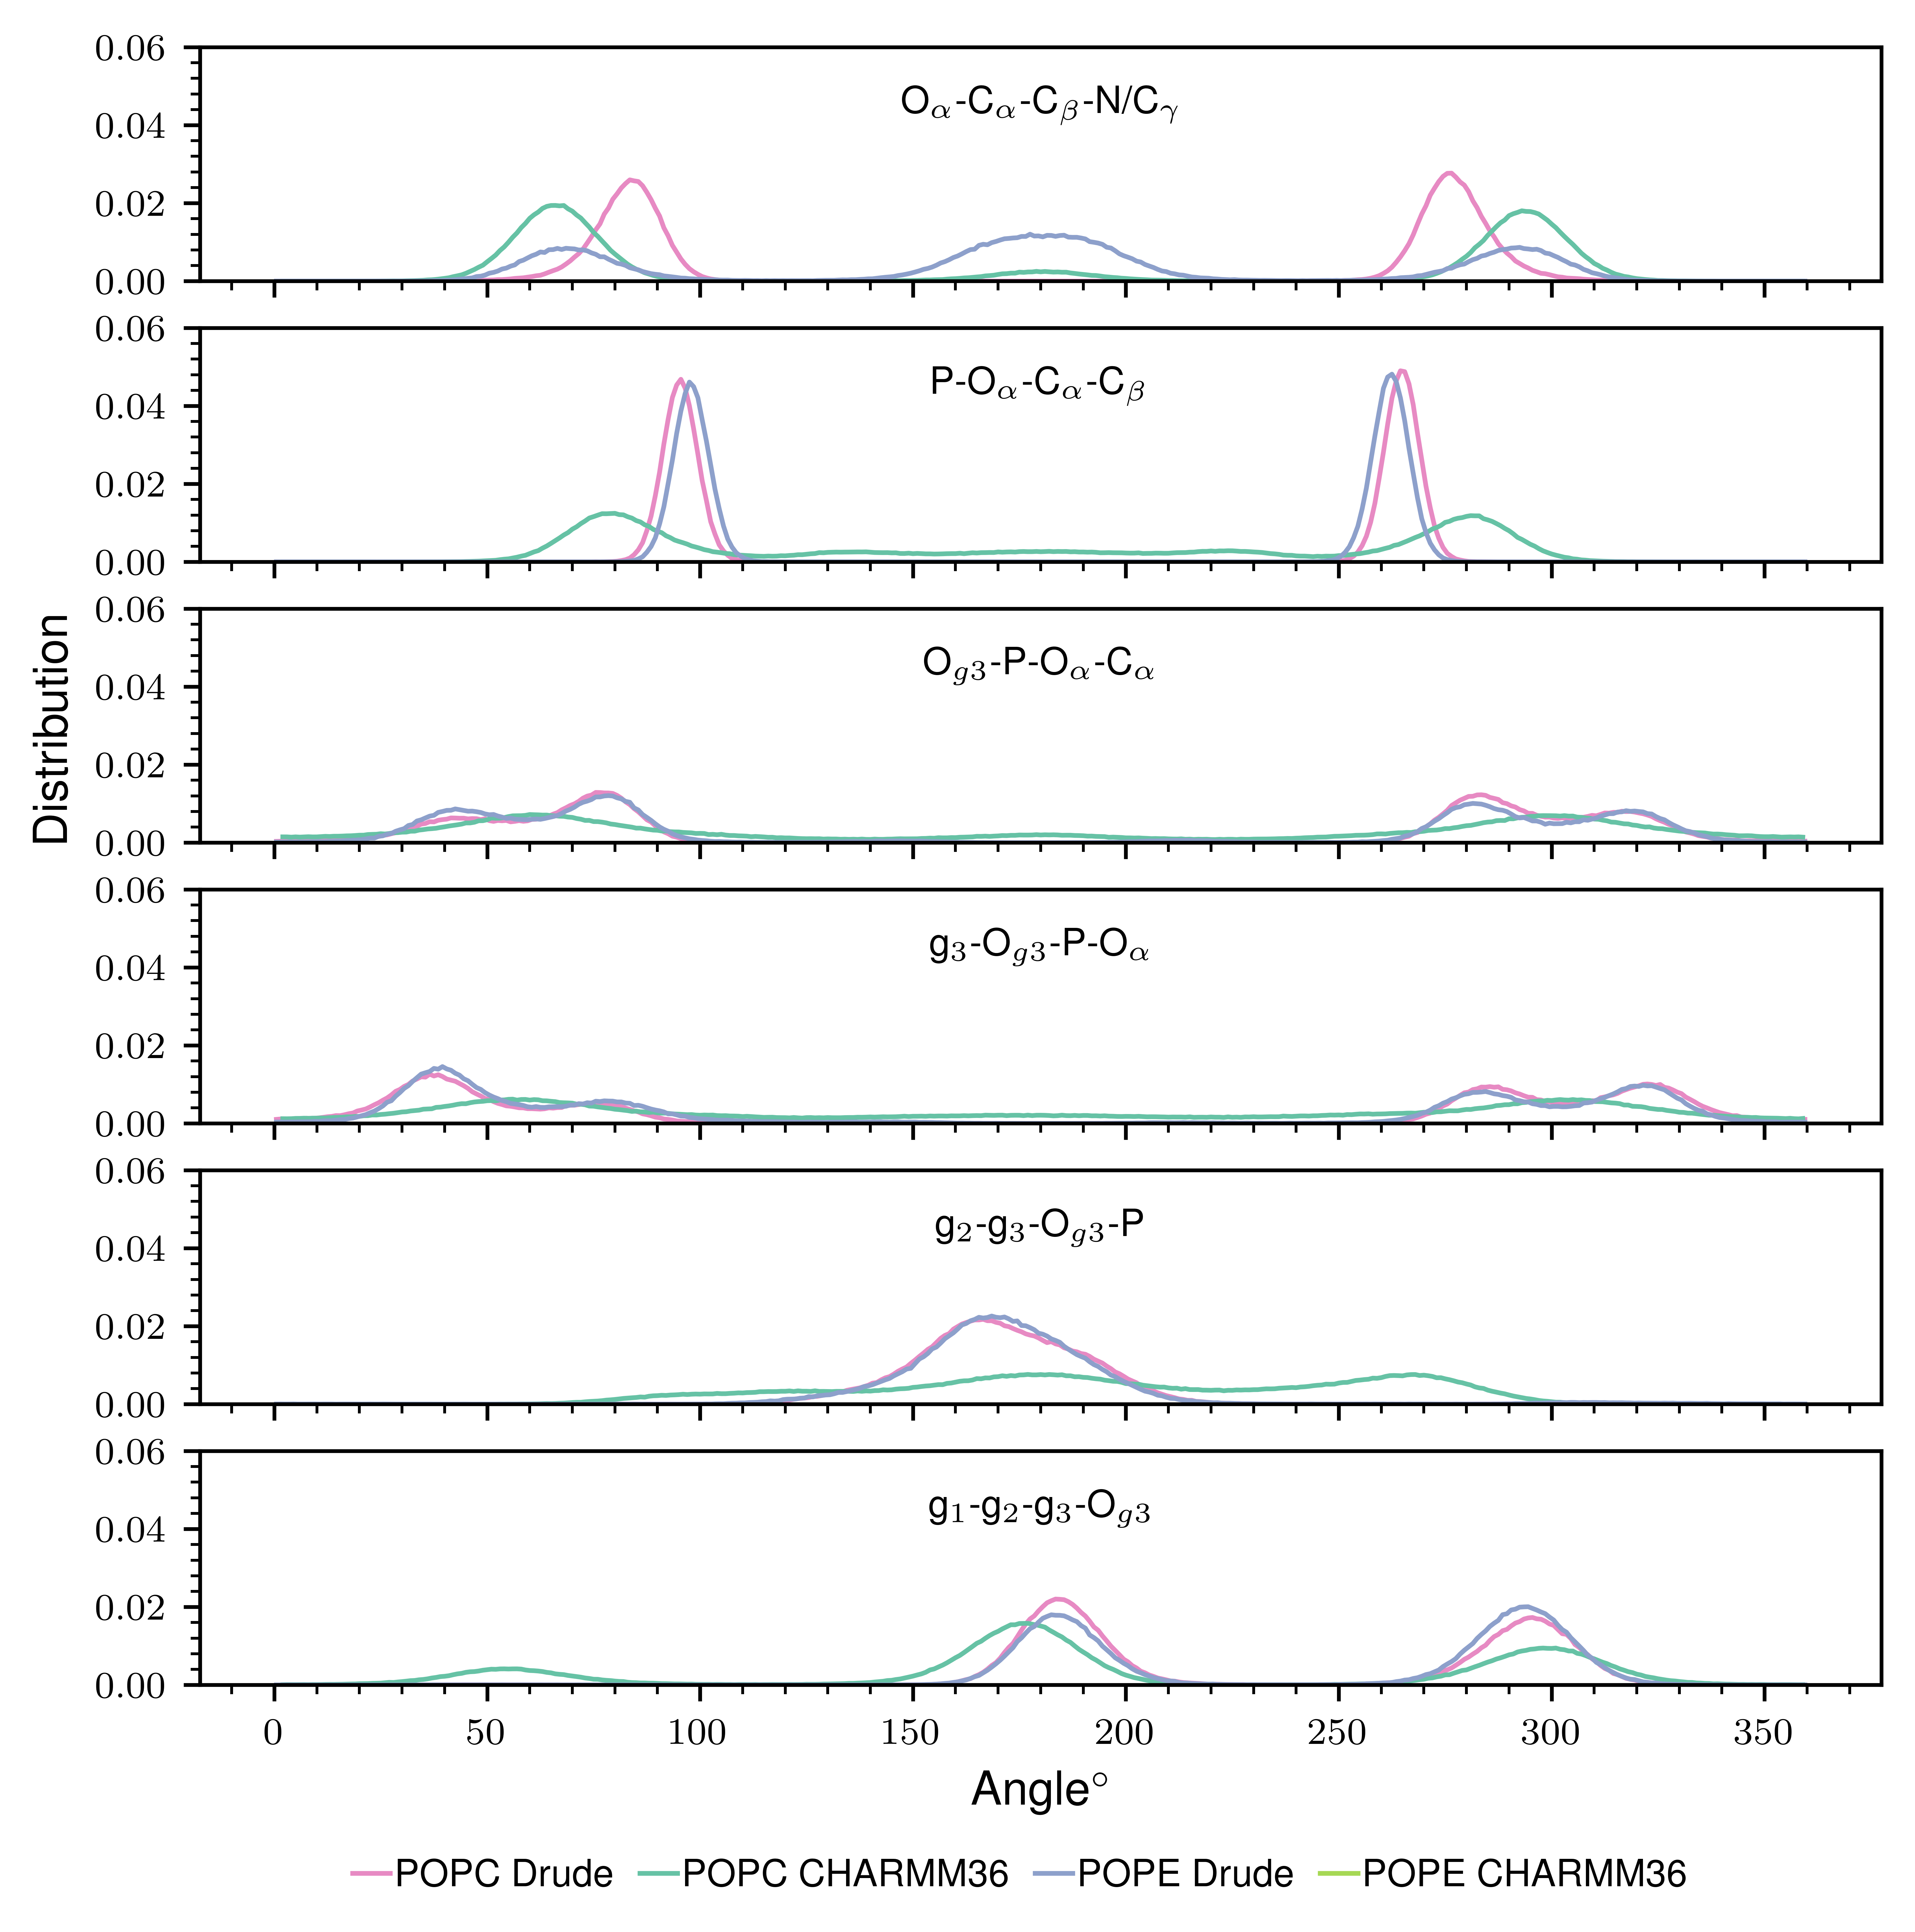

In [62]:
# this is for the main paper

fig, axs = plt.subplots(figsize = (width_two_columns, width_two_columns), ncols = 1, nrows = 6, dpi = 1200, sharex = True, sharey = True)

axs[0].plot(Oa_Ca_Cb_NCg['popc-0'][:,0], Oa_Ca_Cb_NCg['popc-0'][:,1], color = color_popc_0, label = r'POPC Drude ', linewidth = 1)
axs[0].plot(Oa_Ca_Cb_NCg['popc-charmm'][:,0], Oa_Ca_Cb_NCg['popc-charmm'][:,2], color = color_popc_c36, label = r'POPC CHARMM36 ', linewidth = 1)
axs[0].plot(Oa_Ca_Cb_NCg['pope-0'][:,0], Oa_Ca_Cb_NCg['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 1)
axs[0].plot(Oa_Ca_Cb_NCg['pope-charmm'][:,0], Oa_Ca_Cb_NCg['pope-charmm'][:,1], color = color_pope_c36, label = r'POPE CHARMM36 ', linewidth = 1)

axs[1].plot(P_Oa_Ca_Cb['popc-0'][:,0], P_Oa_Ca_Cb['popc-0'][:,1], color = color_popc_0, label = r'POPC Drude ', linewidth = 1)
axs[1].plot(P_Oa_Ca_Cb['popc-charmm'][:,0], P_Oa_Ca_Cb['popc-charmm'][:,2], color = color_popc_c36, label = r'POPC CHARMM36 ', linewidth = 1)
axs[1].plot(P_Oa_Ca_Cb['pope-0'][:,0], P_Oa_Ca_Cb['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 1)
axs[1].plot(P_Oa_Ca_Cb['pope-charmm'][:,0], P_Oa_Ca_Cb['pope-charmm'][:,1], color = color_pope_c36, label = r'POPE CHARMM36 ', linewidth = 1)

axs[2].plot(Og3_P_Oa_Ca['popc-0'][:,0], Og3_P_Oa_Ca['popc-0'][:,1], color = color_popc_0, label = r'POPC Drude ', linewidth = 1)
axs[2].plot(Og3_P_Oa_Ca['popc-charmm'][:,0], Og3_P_Oa_Ca['popc-charmm'][:,2], color = color_popc_c36, label = r'POPC CHARMM36 ', linewidth = 1)
axs[2].plot(Og3_P_Oa_Ca['pope-0'][:,0], Og3_P_Oa_Ca['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 1)
axs[2].plot(Og3_P_Oa_Ca['pope-charmm'][:,0], Og3_P_Oa_Ca['pope-charmm'][:,1], color = color_pope_c36, label = r'POPE CHARMM36 ', linewidth = 1)

axs[3].plot(g3_Og3_P_Oa['popc-0'][:,0], g3_Og3_P_Oa['popc-0'][:,1], color = color_popc_0, label = r'POPC Drude ', linewidth = 1)
axs[3].plot(g3_Og3_P_Oa['popc-charmm'][:,0], g3_Og3_P_Oa['popc-charmm'][:,2], color = color_popc_c36, label = r'POPC CHARMM36 ', linewidth = 1)
axs[3].plot(g3_Og3_P_Oa['pope-0'][:,0], g3_Og3_P_Oa['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 1)
axs[3].plot(g3_Og3_P_Oa['pope-charmm'][:,0], g3_Og3_P_Oa['pope-charmm'][:,1], color = color_pope_c36, label = r'POPE CHARMM36 ', linewidth = 1)

axs[4].plot(g2_g3_Og3_P['popc-0'][:,0], g2_g3_Og3_P['popc-0'][:,1], color = color_popc_0, label = r'POPC Drude ', linewidth = 1)
axs[4].plot(g2_g3_Og3_P['popc-charmm'][:,0], g2_g3_Og3_P['popc-charmm'][:,2], color = color_popc_c36, label = r'POPC CHARMM36 ', linewidth = 1)
axs[4].plot(g2_g3_Og3_P['pope-0'][:,0], g2_g3_Og3_P['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 1)
axs[4].plot(g2_g3_Og3_P['pope-charmm'][:,0], g2_g3_Og3_P['pope-charmm'][:,1], color = color_pope_c36, label = r'POPE CHARMM36 ', linewidth = 1)

axs[5].plot(g1_g2_g3_Og3['popc-0'][:,0], g1_g2_g3_Og3['popc-0'][:,1], color = color_popc_0, label = r'POPC Drude ', linewidth = 1)
axs[5].plot(g1_g2_g3_Og3['popc-charmm'][:,0], g1_g2_g3_Og3['popc-charmm'][:,2], color = color_popc_c36, label = r'POPC CHARMM36 ', linewidth = 1)
axs[5].plot(g1_g2_g3_Og3['pope-0'][:,0], g1_g2_g3_Og3['pope-0'][:,1], color = color_pope_0, label = r'POPE Drude ', linewidth = 1)
axs[5].plot(g1_g2_g3_Og3['pope-charmm'][:,0], g1_g2_g3_Og3['pope-charmm'][:,1], color = color_pope_c36, label = r'POPE CHARMM36 ', linewidth = 1)

axs[5].set_xlabel(r'Angle$^{\circ}$')
axs[2].set_ylabel('Distribution')
axs[5].legend(frameon = False, ncol = 4, bbox_to_anchor=[0.9,-0.65],borderpad = 0.1, handlelength = 1, columnspacing = 0.6, handletextpad = 0.2)

axs[0].set_title(r'O$_{\alpha}$-C$_{\alpha}$-C$_{\beta}$-N/C$_{\gamma}$',y=1.0, pad=-14);
axs[1].set_title(r'P-O$_{\alpha}$-C$_{\alpha}$-C$_{\beta}$',y=1.0, pad=-14);
axs[2].set_title(r'O$_{g3}$-P-O$_{\alpha}$-C$_{\alpha}$',y=1.0, pad=-14);
axs[3].set_title(r'g$_{3}$-O$_{g3}$-P-O$_{\alpha}$',y=1.0, pad=-14);
axs[4].set_title(r'g$_{2}$-g$_{3}$-O$_{g3}$-P',y=1.0, pad=-14);
axs[5].set_title(r'g$_{1}$-g$_{2}$-g$_{3}$-O$_{g3}$',y=1.0, pad=-14);
axs[0].yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
axs[0].xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
axs[0].set_ylim(0,0.06)
fig.savefig('dihedral_distributions_no_salt.eps', dpi = 1200, bbox_layout = 'tight')

## Area per lipid ##

In [66]:
# here we need real trajectories #

pope_universe = mda.Universe('/media/peptid/batu_nmrlipids/nmrlipids/drude/pope_72_72/step2_drude.psf', '/media/peptid/batu_nmrlipids/nmrlipids/drude/pope_72_72/openmm/traj_combined.dcd')
tmp = []
for ts in pope_universe.trajectory:
    tmp.append(pope_universe.trajectory.dimensions[0]*pope_universe.trajectory.dimensions[1])
    
# exp = 56
print(np.mean(np.array(tmp)/72))

57.459324


In [68]:
popc_universe = mda.Universe('/media/peptid/batu_nmrlipids/nmrlipids/drude/popc_72_72/no_salt/drude/openmm/step2_drude.psf', '/media/peptid/batu_nmrlipids/nmrlipids/drude/popc_72_72/no_salt/drude/openmm/run_3/step5_centered_100_500_ns.dcd')
tmp = []
for ts in popc_universe.trajectory:
    tmp.append(popc_universe.trajectory.dimensions[0]*popc_universe.trajectory.dimensions[1])
    
# exp = 64
print(np.mean(np.array(tmp)/72))

55.520267
